Работа с таймсериями

1. Постройте торговлю фондом VFINX так, чтобы максимизировать коэффициент Шарпа (не менее 0.60) при этом минимально теряя в доходности по сравнению со стратегией BuyAndHold данного фонда (CAGR BuyAndHold 10.9%).
2. Для расчёта коэффициента Шарпа получите 10-летние доходности гос. облигаций США самостоятельно. 
3. Учтите дивиденды. Income tax = 0%. Реинвестирование происходит или на следующий день, после ex-dividend даты, или вы можете накапливать дивиденды и реинвестировать их в день ребалансировки вашей стратегии. 
4. По сути система должна строиться на аллокации от 100% в фонд VFINX до 100% выхода в кэш. Для простоты расчётов выход в кэш можно считать выходом в доллар США. Не выходить в какие-либо ценные бумаги.

Условия

1. Комиссии за сделки равны 0.
2. Частота сделок не чаще одного раза в неделю, не реже одного раза в год. 
3.  Вы можете использовать данные по закрытиям индекса VIX, которые имеются в файле, можете не использовать. 
4.  Вы можете использовать простейшие подходы, можете использовать ML и нейросети, можете из имеющихся данных генерировать доп. фичи. 
5.  Запрещено использовать короткие продажи. Запрещены “плечи”. Запрещено добавлять фичи из внешних источников. Запрещена обратная связь до конца задания.

Суть

1.  От Вас не требуется построить идеальную торговую систему. Данная задача показывает как Вы подходите к работе с таймсериями, насколько Вы понимаете тему работы с уменьшением/увеличением весов актива, ваше умение работать с Python, осознаёте, что фондовые рынки не являются эргодической структурой.
2.  Докажите и обоснуйте, что Ваша система высоковероятно будет работоспособна ближайшее десятилетие, устойчива и стабильно работает на различных временных периодах и рыночных состояниях.
3.  Задачу оформите в Jupyter Notebook.
4.  Логику распишите в PowerPoint.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta


# EDA

In [2]:
df = pd.read_json('./VFINX.json')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,VIX_Close
1986-01-02,9.969467,9.969467,9.969467,9.969467,0,0.0,0,18.07
1986-01-03,10.035052,10.035052,10.035052,10.035052,0,0.0,0,17.96
1986-01-06,10.030688,10.030688,10.030688,10.030688,0,0.0,0,17.05
1986-01-07,10.179354,10.179354,10.179354,10.179354,0,0.0,0,17.39
1986-01-08,9.899508,9.899508,9.899508,9.899508,0,0.0,0,19.97
...,...,...,...,...,...,...,...,...
2021-01-15,347.940002,347.940002,347.940002,347.940002,0,0.0,0,24.34
2021-01-19,350.779999,350.779999,350.779999,350.779999,0,0.0,0,23.24
2021-01-20,355.670013,355.670013,355.670013,355.670013,0,0.0,0,21.58
2021-01-21,355.809998,355.809998,355.809998,355.809998,0,0.0,0,21.32


In [3]:
# Reset index to the column for convinient operations

df = df.reset_index(names='Date')
df.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,VIX_Close
0,1986-01-02,9.969467,9.969467,9.969467,9.969467,0,0.0,0,18.07
1,1986-01-03,10.035052,10.035052,10.035052,10.035052,0,0.0,0,17.96
2,1986-01-06,10.030688,10.030688,10.030688,10.030688,0,0.0,0,17.05
3,1986-01-07,10.179354,10.179354,10.179354,10.179354,0,0.0,0,17.39
4,1986-01-08,9.899508,9.899508,9.899508,9.899508,0,0.0,0,19.97
5,1986-01-09,9.812057,9.812057,9.812057,9.812057,0,0.0,0,20.20
6,1986-01-10,9.807683,9.807683,9.807683,9.807683,0,0.0,0,18.45
7,1986-01-13,9.842667,9.842667,9.842667,9.842667,0,0.0,0,18.80
8,1986-01-14,9.842667,9.842667,9.842667,9.842667,0,0.0,0,18.06
9,1986-01-15,9.921375,9.921375,9.921375,9.921375,0,0.0,0,18.87


In [4]:
print(df.info())
print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8833 entries, 0 to 8832
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8833 non-null   datetime64[ns]
 1   Open          8833 non-null   float64       
 2   High          8833 non-null   float64       
 3   Low           8833 non-null   float64       
 4   Close         8833 non-null   float64       
 5   Volume        8833 non-null   int64         
 6   Dividends     8833 non-null   float64       
 7   Stock Splits  8833 non-null   int64         
 8   VIX_Close     8833 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 621.2 KB
None



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,VIX_Close
count,8833,8833.000000,8833.000000,8833.000000,8833.000000,8833.0,8833.000000,8833.0,8833.000000
mean,2003-07-08 10:01:23.957885312,91.410905,91.410905,91.410905,91.410905,0.0,0.008916,0.0,19.925365
min,1986-01-02 00:00:00,9.693998,9.693998,9.693998,9.693998,0.0,0.000000,0.0,9.140000
25%,1994-09-28 00:00:00,26.499744,26.499744,26.499744,26.499744,0.0,0.000000,0.0,14.090000
50%,2003-07-09 00:00:00,77.715508,77.715508,77.715508,77.715508,0.0,0.000000,0.0,18.130000
75%,2012-04-13 00:00:00,107.777855,107.777855,107.777855,107.777855,0.0,0.000000,0.0,23.250000
max,2021-01-22 00:00:00,355.809998,355.809998,355.809998,355.809998,0.0,1.390000,0.0,150.190000
std,NaN,74.364430,74.364430,74.364430,74.364430,0.0,0.081741,0.0,8.501164


Термины:
1) VFINX - Vanguard 500 Index Fund отслеживает динамику индекса S&P 500, состоящий из 500 крупнейших компаний США. Фонд выплачивает дивиденды.
2) Коэффициент Шарпа - Sharpe Ratio показатель, используемый для оценки эффективности инвестиционного портфеля или стратегии с учетом риска. Он рассчитывается как отношение избыточной доходности (доходность портфеля минус безрисковая ставка, например, доходность государственных облигаций) к стандартному отклонению (волатильности) этой доходности.
**Sharpe Ratio** = (средняя доходность портфеля - доходность 10 летних гос облигаций) / (волатильность портфеля или среднее отклонение доходности)

Описание данных VFINX:
- Date (datetime) - дата торгов
- Open (float) - стоимость пая фонда на момент начала торгов (Дублирует столбец Close, есть смысл удалить)
- High (float) - максимальная цена за день (Дублирует столбец Close, есть смысл удалить)
- Low (float) - минимальная цена за день (Дублирует столбец Close, есть смысл удалить)
- Close (float) - стоимость пая фонда на момент окончания торгов
- Volume (int) - объем торгов за день (не содержит данных в df, есть смысл удалить)
- Dividends (float) - сумма выплаченных дивидендов на 1 пай, в указанную дату
- Stock Splits (int) - дробление паёв фонда (не содержит данных в df, есть смысл удалить)
- VIX_Close (float) - индекс, который измеряет ожидаемую волатильность на фондовом рынке в течение следующих 30 дней, основываясь на опционах на индекс S&P 500


In [5]:
# Validate data

print('Null values:')
print(df.isnull().sum())
print('Duplicates:')
print(df.duplicated().sum())

Null values:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
VIX_Close       0
dtype: int64
Duplicates:
0


**В данных отсутствуют пустые значения и повторяющиеся строки**
**Столбцы Open, High, Low, Close повторяют друг друга. Оставим только CLose**

In [6]:
# Drop useless columns

df = df.drop(['Stock Splits', 'Volume', 'Open', 'High', 'Low'], axis=1)
df.head(10)

,Date,Close,Dividends,VIX_Close
0,1986-01-02,9.969467,0.0,18.07
1,1986-01-03,10.035052,0.0,17.96
2,1986-01-06,10.030688,0.0,17.05
3,1986-01-07,10.179354,0.0,17.39
4,1986-01-08,9.899508,0.0,19.97
5,1986-01-09,9.812057,0.0,20.20
6,1986-01-10,9.807683,0.0,18.45
7,1986-01-13,9.842667,0.0,18.80
8,1986-01-14,9.842667,0.0,18.06
9,1986-01-15,9.921375,0.0,18.87


In [7]:
# Добавляем данные по доходности гос облигаций
# Берём данные по доходности 10 летних гос облигаций США с сайта https://fred.stlouisfed.org/series/dgs10
# (Сайт предоставляет данные управляемые Федеральным резервным банком Сент-Луиса, одним из 12 региональных банков Федеральной резервной системы США)
# В процессе в датасете обнаружены отсутвующий значения, который было решено дополнить данными с сайта https://ru.investing.com/rates-bonds/u.s.-10-year-bond-yield-historical-data
df_bonds_1 = pd.read_csv('./DGS10.csv')
df_bonds_2 = pd.concat([pd.read_csv('./Прошлые данные доходности облигаций США 10-летние 86-05.csv')
                     ,pd.read_csv('./Прошлые данные доходности облигаций США 10-летние 05-21.csv')])
df_bonds_1

,DATE,DGS10
0,1986-01-02,9.04
1,1986-01-03,9.05
2,1986-01-06,9.07
3,1986-01-07,8.94
4,1986-01-08,9.13
...,...,...
9142,2021-01-18,.
9143,2021-01-19,1.10
9144,2021-01-20,1.10
9145,2021-01-21,1.12


In [8]:
df_bonds_1.loc[df_bonds_1['DGS10'] == '.']

,DATE,DGS10
12,1986-01-20,.
32,1986-02-17,.
61,1986-03-28,.
102,1986-05-26,.
131,1986-07-04,.
...,...,...
9094,2020-11-11,.
9105,2020-11-26,.
9126,2020-12-25,.
9131,2021-01-01,.


In [9]:
df_bonds_1 = df_bonds_1.rename(columns={'DATE': 'Date'})
df_bonds_1['Date'] = pd.to_datetime(df_bonds_1['Date'], format='%Y-%m-%d')
df_bonds_1['DGS10'] = df_bonds_1['DGS10'].apply(lambda x: None if x == '.' else x).astype(float)

In [10]:
df_bonds_2.head(10)

,Дата,Цена,Откр.,Макс.,Мин.,Изм. %
0,25.10.2005,"4,540","4,540","4,540","4,540","2,07%"
1,24.10.2005,"4,448","4,448","4,448","4,448","1,28%"
2,21.10.2005,"4,392","4,392","4,392","4,392","-0,97%"
3,20.10.2005,"4,435","4,435","4,435","4,435","-0,76%"
4,19.10.2005,"4,469","4,469","4,469","4,469","-0,18%"
5,18.10.2005,"4,477","4,477","4,477","4,477","-0,49%"
6,17.10.2005,"4,499","4,499","4,499","4,499","0,40%"
7,14.10.2005,"4,481","4,481","4,481","4,481","0,31%"
8,13.10.2005,"4,467","4,467","4,467","4,467","0,49%"
9,12.10.2005,"4,445","4,445","4,445","4,445","1,14%"


In [11]:
# Оставляем только Дату и Цену (Доходность) со второго датасета

df_bonds_2 = df_bonds_2[['Дата', 'Цена']].rename(columns={'Дата': 'Date', 'Цена': 'Bonds_income'})

df_bonds_2['Date'] = pd.to_datetime(df_bonds_2['Date'], format='%d.%m.%Y')
df_bonds_2['Bonds_income'] = round(df_bonds_2['Bonds_income'].str.replace(',', '.').astype(float), 2)
df_bonds_2

,Date,Bonds_income
0,2005-10-25,4.54
1,2005-10-24,4.45
2,2005-10-21,4.39
3,2005-10-20,4.43
4,2005-10-19,4.47
...,...,...
3952,2005-11-01,4.57
3953,2005-10-31,4.56
3954,2005-10-28,4.57
3955,2005-10-27,4.55


In [12]:
merge_df = pd.merge(df_bonds_1, df_bonds_2, on='Date', how='left')
merge_df

,Date,DGS10,Bonds_income
0,1986-01-02,9.04,9.02
1,1986-01-03,9.05,9.03
2,1986-01-06,9.07,9.05
3,1986-01-07,8.94,8.91
4,1986-01-08,9.13,9.10
...,...,...,...
9142,2021-01-18,NaN,1.10
9143,2021-01-19,1.10,1.09
9144,2021-01-20,1.10,1.08
9145,2021-01-21,1.12,1.11


In [13]:
# How many values we can update

merge_df.loc[(merge_df['DGS10'].isnull())
            & (merge_df['Bonds_income'].notnull())]

,Date,DGS10,Bonds_income
12,1986-01-20,NaN,9.22
32,1986-02-17,NaN,8.72
61,1986-03-28,NaN,7.46
102,1986-05-26,NaN,7.90
131,1986-07-04,NaN,7.30
...,...,...,...
9047,2020-09-07,NaN,0.72
9072,2020-10-12,NaN,0.76
9094,2020-11-11,NaN,0.98
9105,2020-11-26,NaN,0.86


,Date,DGS10,Bonds_income
count,9147,8770.000000,8893.000000
mean,2003-07-14 14:23:48.665136256,4.839253,4.793073
min,1986-01-02 00:00:00,0.520000,0.510000
25%,1994-10-08 12:00:00,2.770000,2.740000
50%,2003-07-15 00:00:00,4.660000,4.620000
75%,2012-04-18 12:00:00,6.600000,6.560000
max,2021-01-22 00:00:00,10.230000,10.220000
std,NaN,2.283757,2.274402


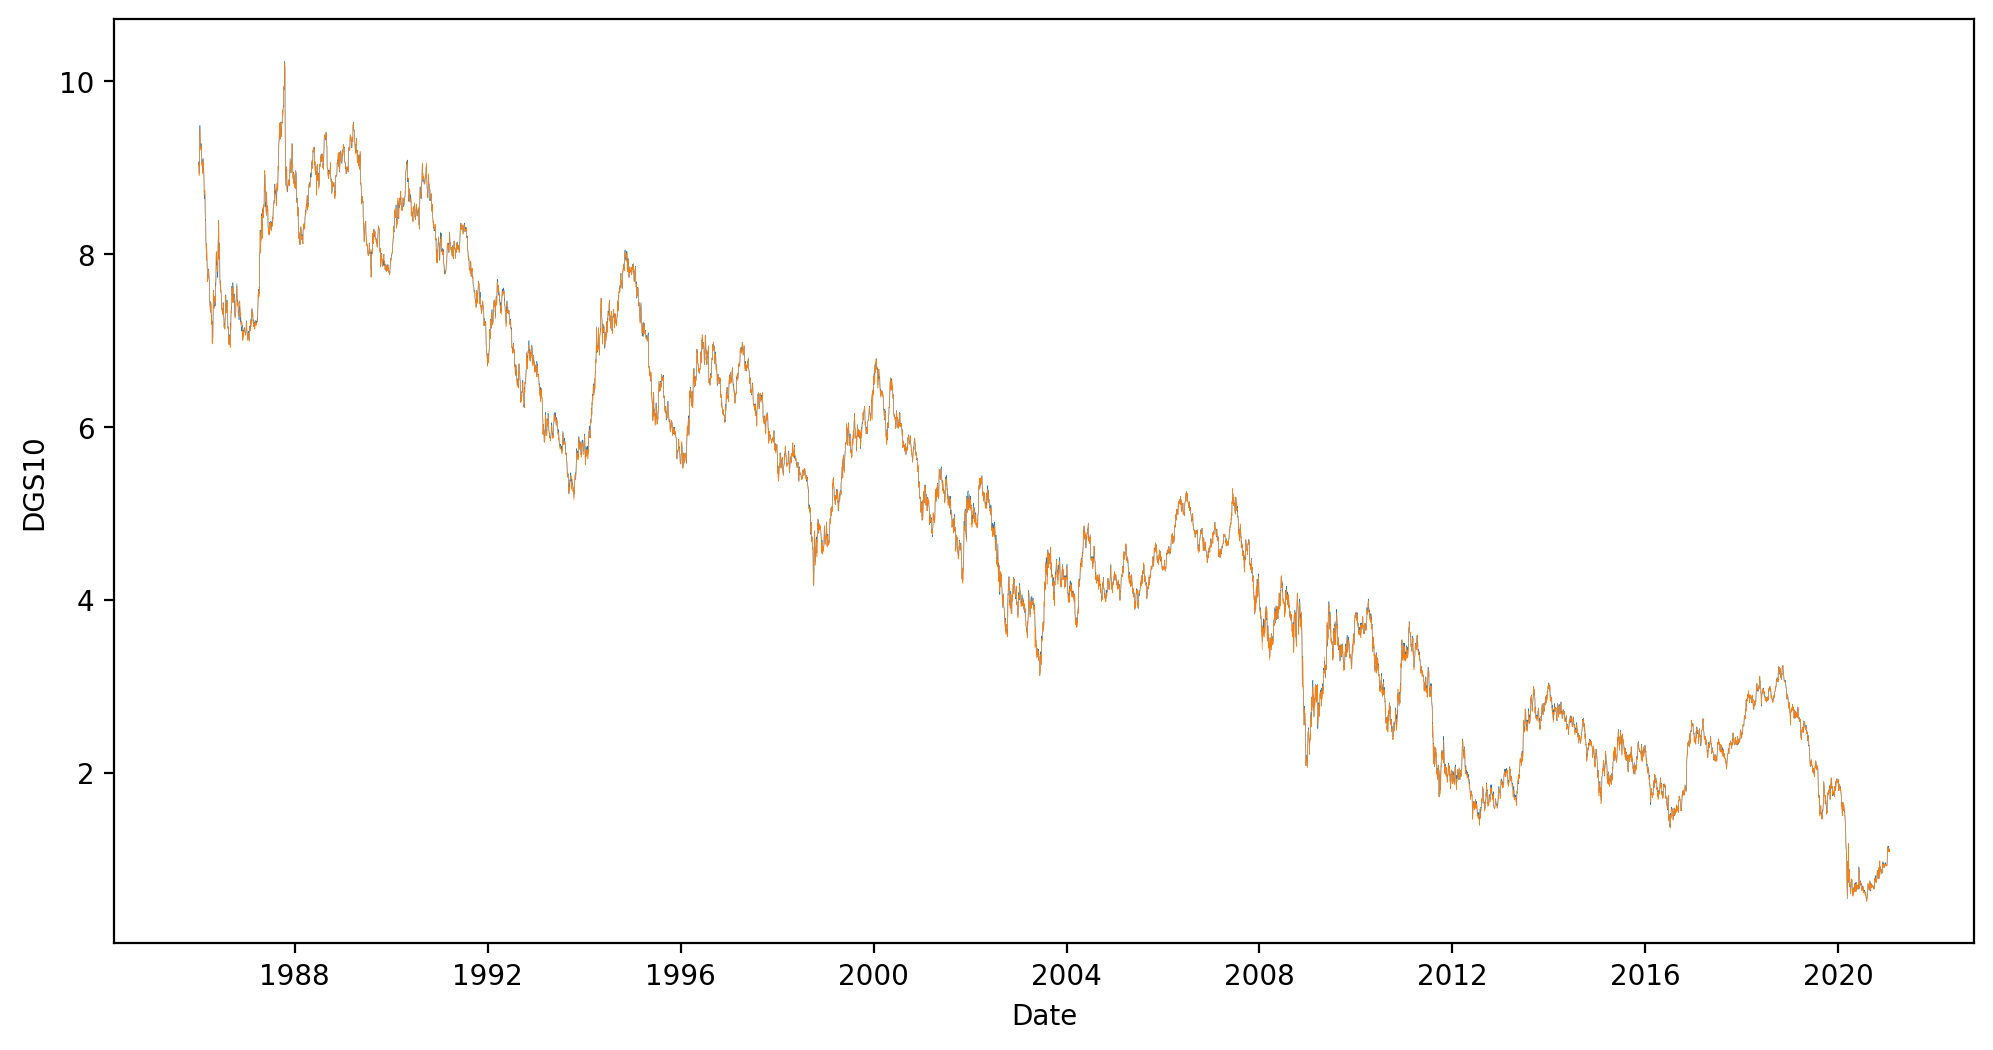

In [14]:
# Validate data

plt.figure(figsize=(12, 6), dpi=200)

sns.lineplot(data=merge_df, x='Date', y='DGS10', alpha=1, lw=0.2);
sns.lineplot(data=merge_df, x='Date', y='Bonds_income', alpha=1, lw=0.2);
merge_df.describe()

Данные по доходности совпадают в первом и втором датасете.
Учитываем как более надёжный источник данных, сайт https://fred.stlouisfed.org/series/dgs10
Заполняем 189 строк отуствующих значений данными с сайта https://ru.investing.com/rates-bonds/u.s.-10-year-bond-yield-historical-data

In [15]:
merge_df['DGS10'] = merge_df['DGS10'].fillna(merge_df['Bonds_income'])
merge_df

,Date,DGS10,Bonds_income
0,1986-01-02,9.04,9.02
1,1986-01-03,9.05,9.03
2,1986-01-06,9.07,9.05
3,1986-01-07,8.94,8.91
4,1986-01-08,9.13,9.10
...,...,...,...
9142,2021-01-18,1.10,1.10
9143,2021-01-19,1.10,1.09
9144,2021-01-20,1.10,1.08
9145,2021-01-21,1.12,1.11


In [16]:
# Join data

data = pd.merge(df, merge_df.drop('Bonds_income', axis=1), how='left', on='Date')
data

,Date,Close,Dividends,VIX_Close,DGS10
0,1986-01-02,9.969467,0.0,18.07,9.04
1,1986-01-03,10.035052,0.0,17.96,9.05
2,1986-01-06,10.030688,0.0,17.05,9.07
3,1986-01-07,10.179354,0.0,17.39,8.94
4,1986-01-08,9.899508,0.0,19.97,9.13
...,...,...,...,...,...
8828,2021-01-15,347.940002,0.0,24.34,1.11
8829,2021-01-19,350.779999,0.0,23.24,1.10
8830,2021-01-20,355.670013,0.0,21.58,1.10
8831,2021-01-21,355.809998,0.0,21.32,1.12


In [17]:
print(data.info())

# Обнаружены пустые значения в Bonds_income

data.loc[data['DGS10'].isnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8833 entries, 0 to 8832
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8833 non-null   datetime64[ns]
 1   Close      8833 non-null   float64       
 2   Dividends  8833 non-null   float64       
 3   VIX_Close  8833 non-null   float64       
 4   DGS10      8813 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 345.2 KB
None


,Date,Close,Dividends,VIX_Close,DGS10
448,1987-10-12,14.311877,0.0,24.59,NaN
470,1987-11-11,11.221026,0.0,55.55,NaN
515,1988-01-18,11.739610,0.0,35.19,NaN
700,1988-10-10,13.297021,0.0,19.67,NaN
724,1988-11-11,12.845943,0.0,22.92,NaN
767,1989-01-16,13.699420,0.0,17.19,NaN
952,1989-10-09,17.757084,0.0,16.37,NaN
1019,1990-01-15,16.774876,0.0,26.34,NaN
1204,1990-10-08,16.007051,0.0,28.04,NaN
1229,1990-11-12,16.368912,0.0,25.60,NaN


In [18]:
# В признаке доходности облигаций по прежнему присутсвуют пустые значения, предпологаю что это празднечные/выходные дни в которые биржа не работала.
# Проверяю предположение
# Действительно многие даты пересикаются с государственными праздниками в США когда биржа не работает
# 12 октября 1987 года (Columbus Day)
# 11 ноября (Veterans Day)
# 18 января (Martin Luther King Jr. Day)
# 10 октября (Columbus Day)
# 16 января (Martin Luther King Jr. Day)

# Заполним отсутствующие для DGS10 значения предыдущим известным значением.

data['DGS10'] = data['DGS10'].ffill()

# Заполним отсутствующие для DGS10 значения предыдущим известным значением
data.info()

# Преобразуем доходность облигаций к общему формату
data['DGS10'] = round(data['DGS10'] / 100 , 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8833 entries, 0 to 8832
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8833 non-null   datetime64[ns]
 1   Close      8833 non-null   float64       
 2   Dividends  8833 non-null   float64       
 3   VIX_Close  8833 non-null   float64       
 4   DGS10      8833 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 345.2 KB


In [19]:
data

,Date,Close,Dividends,VIX_Close,DGS10
0,1986-01-02,9.969467,0.0,18.07,0.0904
1,1986-01-03,10.035052,0.0,17.96,0.0905
2,1986-01-06,10.030688,0.0,17.05,0.0907
3,1986-01-07,10.179354,0.0,17.39,0.0894
4,1986-01-08,9.899508,0.0,19.97,0.0913
...,...,...,...,...,...
8828,2021-01-15,347.940002,0.0,24.34,0.0111
8829,2021-01-19,350.779999,0.0,23.24,0.0110
8830,2021-01-20,355.670013,0.0,21.58,0.0110
8831,2021-01-21,355.809998,0.0,21.32,0.0112


DGS10       -0.811894
VIX_Close   -0.122005
Dividends    0.055133
Date         0.897335
Name: Close, dtype: float64

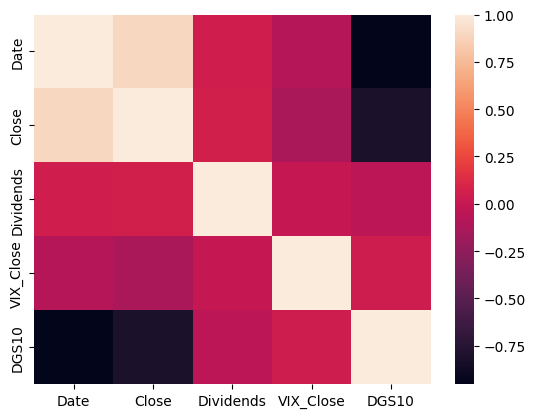

In [20]:
# Рассмотрим корреляцию признаков
data_corr = data.corr()
sns.heatmap(data_corr)

data_corr['Close'].sort_values()[:-1]
# data_test.head(40)

## Feature engineering ##

In [21]:
# Feature engineering
from datetime import datetime


# Расчитаем дневную доходность, для простоты расчёта учтём реинвестирование дивидендов на следующий день. (можно улучшить)
data['Returns'] = ((data['Close'] + data['Dividends'].shift(1)) / data['Close'].shift(1)) - 1
data['Cumulative_Returns'] = (1 + data['Returns']).cumprod()
data['Add_Close'] = data['Close']
for i in range(1, len(data)):
    data.at[i, 'Add_Close'] = data.at[i - 1, 'Add_Close'] * (1 + data.at[i, 'Returns'])


# Переместим колонку Date в индекс, для работы с тайм сериями
data.index = data.Date
data = data.drop('Date', axis=1)

<Axes: xlabel='Date', ylabel='Close'>

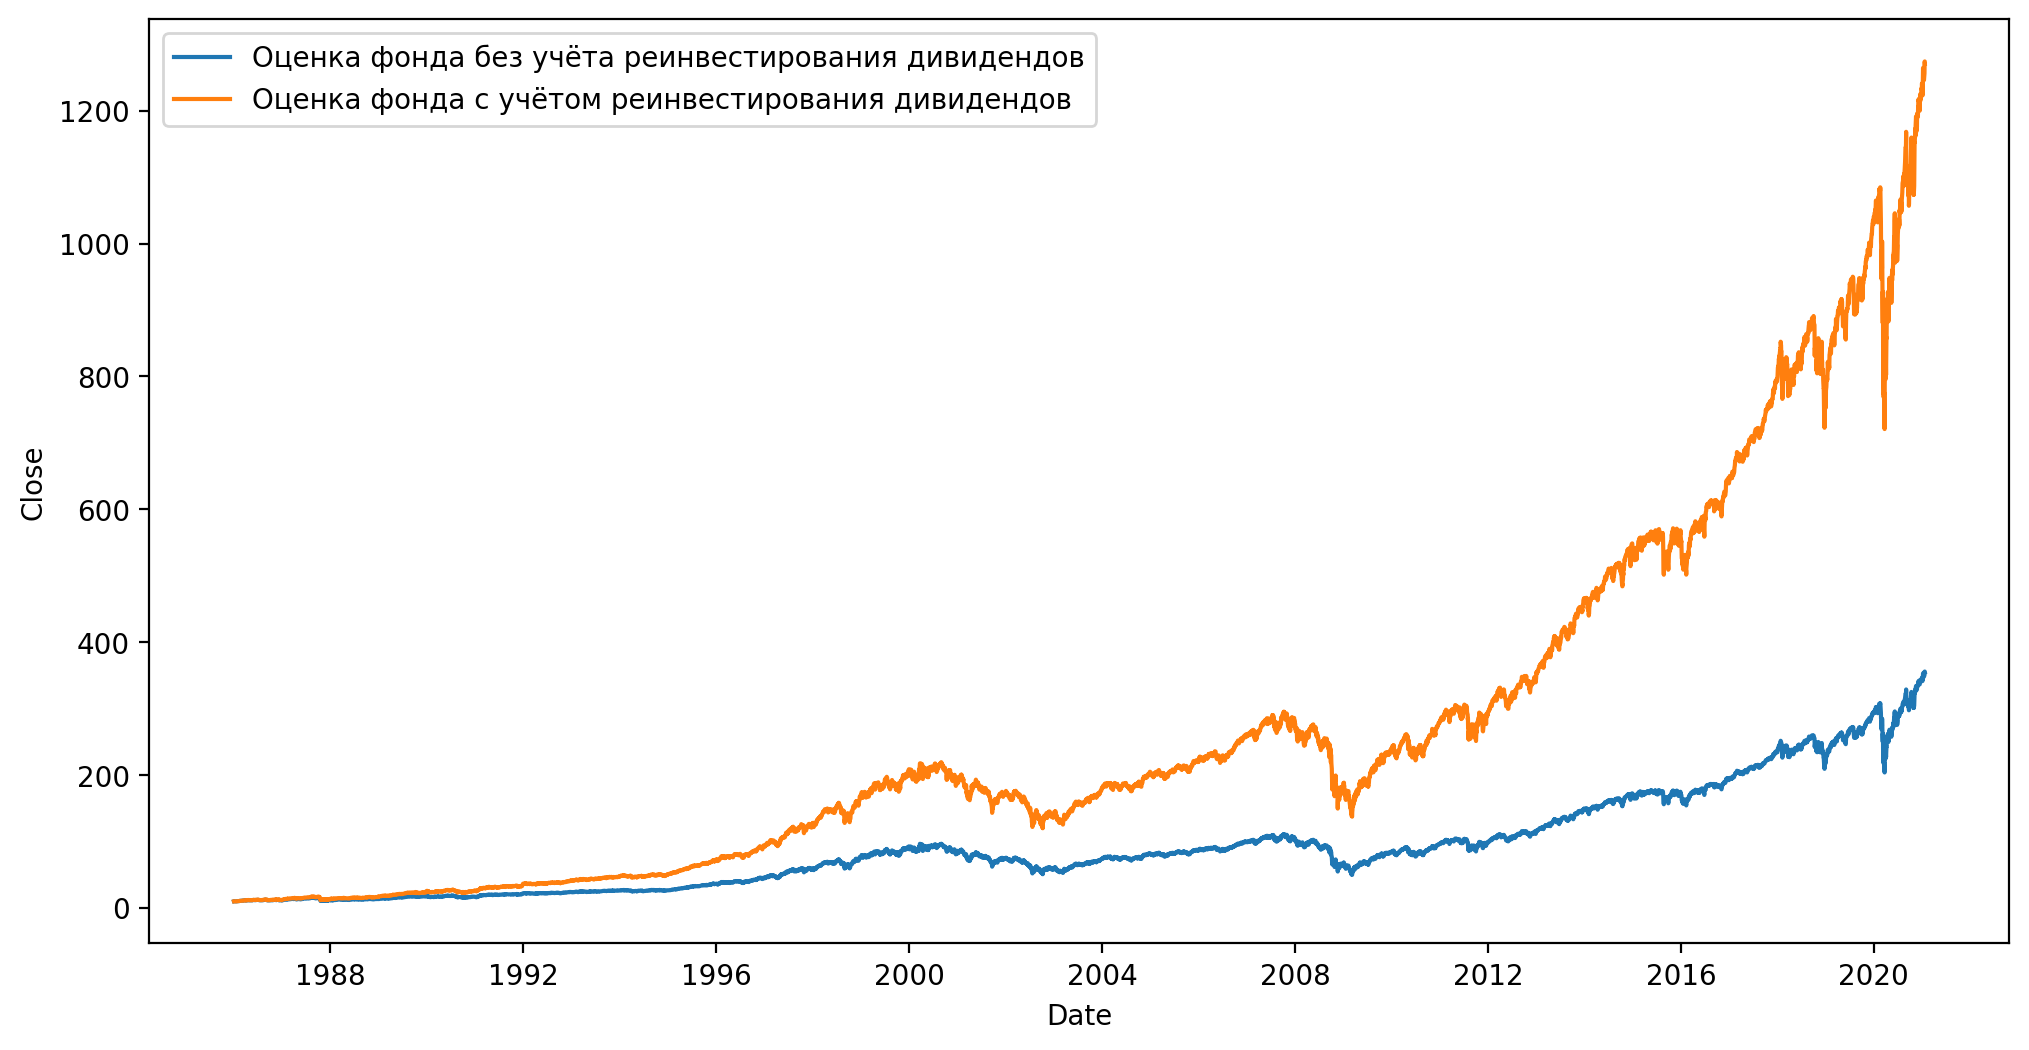

In [22]:
# Сотрим как сложный процент влияет на итоговую доходность

plt.figure(figsize=(12, 6), dpi=200)

sns.lineplot(data=data, x='Date', y='Close', label='Оценка фонда без учёта реинвестирования дивидендов')
sns.lineplot(data=data, x='Date', y='Add_Close', label='Оценка фонда с учётом реинвестирования дивидендов')

# plt.xlim((datetime(2019, 1, 1), (datetime(2021, 1, 1))))
# plt.ylim((150, 350));

**CAGR и sharp**

In [23]:
# Вычислим коэффициенты CAGR и sharp для стратегии BuyAndHold на всех данных.
# Константа 252 - количество торговых дней в году.
# print(data.groupby(data.index.year)['Open'].count().mode())


CAGR = (data.iloc[-1]['Close'] / data.iloc[0]['Close']) ** (1/(len(data)/252)) - 1
print('CAGR:', CAGR)

# CAGR отличается от заявленного в задании, расчитаем с дивидендами

CAGR_div = (data.iloc[-1]['Add_Close'] / data.iloc[0]['Close']) ** (1/(len(data)/252)) - 1
print('CAGR with dividends:', CAGR_div)

# Расчёт CAGR с учетом дивидендов также отличатеся, предпологаю, что в задании было взято другое окно для CAGR


# Рассчитаем коэффициент Шарпа
# (средняя доходность портфеля - срденяя 10 летняя доходность гос облигаций) / волатильность портфеля)
return_mean = data['Returns'].mean() * 252
std_dev = data['Returns'].std() * np.sqrt(252)
risk_mean = data['DGS10'].mean()

print('Sharpe ratio:', (return_mean - risk_mean) / std_dev)
data

## Buy and Hold
## CAGR = 0.14
## Sharpe = 0.57

CAGR: 0.1072759362743354
CAGR with dividends: 0.1483162192030021
Sharpe ratio: 0.5744863699581622


,Close,Dividends,VIX_Close,DGS10,Returns,Cumulative_Returns,Add_Close
Date,,,,,,,
1986-01-02,9.969467,0.0,18.07,0.0904,NaN,NaN,9.969467
1986-01-03,10.035052,0.0,17.96,0.0905,0.006579,1.006579,10.035052
1986-01-06,10.030688,0.0,17.05,0.0907,-0.000435,1.006141,10.030688
1986-01-07,10.179354,0.0,17.39,0.0894,0.014821,1.021053,10.179354
1986-01-08,9.899508,0.0,19.97,0.0913,-0.027492,0.992983,9.899508
...,...,...,...,...,...,...,...
2021-01-15,347.940002,0.0,24.34,0.0111,-0.007191,124.981314,1245.997110
2021-01-19,350.779999,0.0,23.24,0.0110,0.008162,126.001451,1256.167332
2021-01-20,355.670013,0.0,21.58,0.0110,0.013940,127.757962,1273.678812


In [24]:
# Чтобы рассмотреть насоклько ожидаемая волатильность VIX совпадает с реальной волатильностью фонда сделаем следующиее:


data['VIX_Close'] = data['VIX_Close'] / 100        # Преобразуем VIX_Close к общему формату процентов
data['STD_Dev'] = data['Returns'].rolling(30).std() * np.sqrt(252)    # Добавим действующую волатильность портфеля за последнии 30 дней
data['Predicted_Dev'] = data['VIX_Close'].shift(30)        # Сместим VIX на 30 дней вперёд чтобы сравнить с реальной волатильностью за этот период

data

,Close,Dividends,VIX_Close,DGS10,Returns,Cumulative_Returns,Add_Close,STD_Dev,Predicted_Dev
Date,,,,,,,,,
1986-01-02,9.969467,0.0,0.1807,0.0904,NaN,NaN,9.969467,NaN,NaN
1986-01-03,10.035052,0.0,0.1796,0.0905,0.006579,1.006579,10.035052,NaN,NaN
1986-01-06,10.030688,0.0,0.1705,0.0907,-0.000435,1.006141,10.030688,NaN,NaN
1986-01-07,10.179354,0.0,0.1739,0.0894,0.014821,1.021053,10.179354,NaN,NaN
1986-01-08,9.899508,0.0,0.1997,0.0913,-0.027492,0.992983,9.899508,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-01-15,347.940002,0.0,0.2434,0.0111,-0.007191,124.981314,1245.997110,0.101436,0.2117
2021-01-19,350.779999,0.0,0.2324,0.0110,0.008162,126.001451,1256.167332,0.103351,0.2128
2021-01-20,355.670013,0.0,0.2158,0.0110,0.013940,127.757962,1273.678812,0.107486,0.2079


Close corr: DGS10                -0.811894
VIX_Close            -0.122005
Predicted_Dev        -0.116683
STD_Dev              -0.039056
Returns               0.004402
Dividends             0.055133
Add_Close             0.995333
Cumulative_Returns    0.995334
Name: Close, dtype: float64

VIX corr: Returns              -0.132676
Close                -0.122005
Cumulative_Returns   -0.116983
Add_Close            -0.116953
Dividends            -0.005855
DGS10                 0.032434
Predicted_Dev         0.660117
STD_Dev               0.856167
Name: VIX_Close, dtype: float64


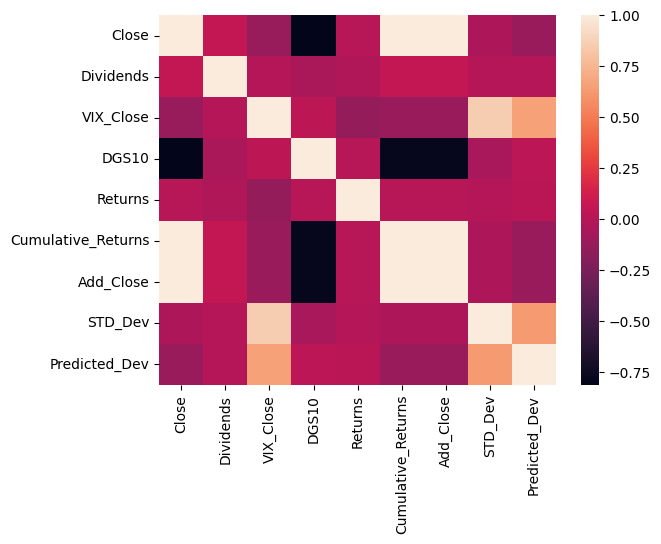

In [25]:
# Визуализируем данные
data_corr = data.corr()

sns.heatmap(data_corr)
print('Close corr:', data_corr['Close'].sort_values()[:-1])
print()
print('VIX corr:', data_corr['VIX_Close'].sort_values()[:-1])


# Из корреляции с ценой закрытия видно что VIX_Close (ожидаемая волатильность) имеет отрицательное значение -0.12
# Это говорит о том что во время волатильности цена актива чаще будет снижена чем увеличена
# Чем ниже VIX чтем выше цена закрытия и что в долгосрочной перспективе избегая волатильных участков, мы уменьшим убытки.

# Из корреляции с STD_Dev (действующая волатильность) видно что корреляция с Predicted_Dev предсказываемая индексом VIX имеет значение 0.856
# Это говорит о том что индекс VIX с Большой точностью предсказывает ожидаемую волатильность
# Значит на основе индекса VIX можно построить торговую стратегию для снижения волатильности портфеля и увеличения коэффициента Шарпа

,Close,Dividends,VIX_Close,DGS10,Returns,Cumulative_Returns,Add_Close,STD_Dev,Predicted_Dev,SMA_VIX_short,SMA_VIX_long
Date,,,,,,,,,,,
1986-01-02,9.969467,0.0,0.1807,0.0904,NaN,NaN,9.969467,NaN,NaN,0.180700,0.180700
1986-01-03,10.035052,0.0,0.1796,0.0905,0.006579,1.006579,10.035052,NaN,NaN,0.180150,0.180150
1986-01-06,10.030688,0.0,0.1705,0.0907,-0.000435,1.006141,10.030688,NaN,NaN,0.176933,0.176933
1986-01-07,10.179354,0.0,0.1739,0.0894,0.014821,1.021053,10.179354,NaN,NaN,0.176175,0.176175
1986-01-08,9.899508,0.0,0.1997,0.0913,-0.027492,0.992983,9.899508,NaN,NaN,0.180880,0.180880
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,347.940002,0.0,0.2434,0.0111,-0.007191,124.981314,1245.997110,0.101436,0.2117,0.233275,0.257805
2021-01-19,350.779999,0.0,0.2324,0.0110,0.008162,126.001451,1256.167332,0.103351,0.2128,0.233930,0.257926
2021-01-20,355.670013,0.0,0.2158,0.0110,0.013940,127.757962,1273.678812,0.107486,0.2079,0.233935,0.257757


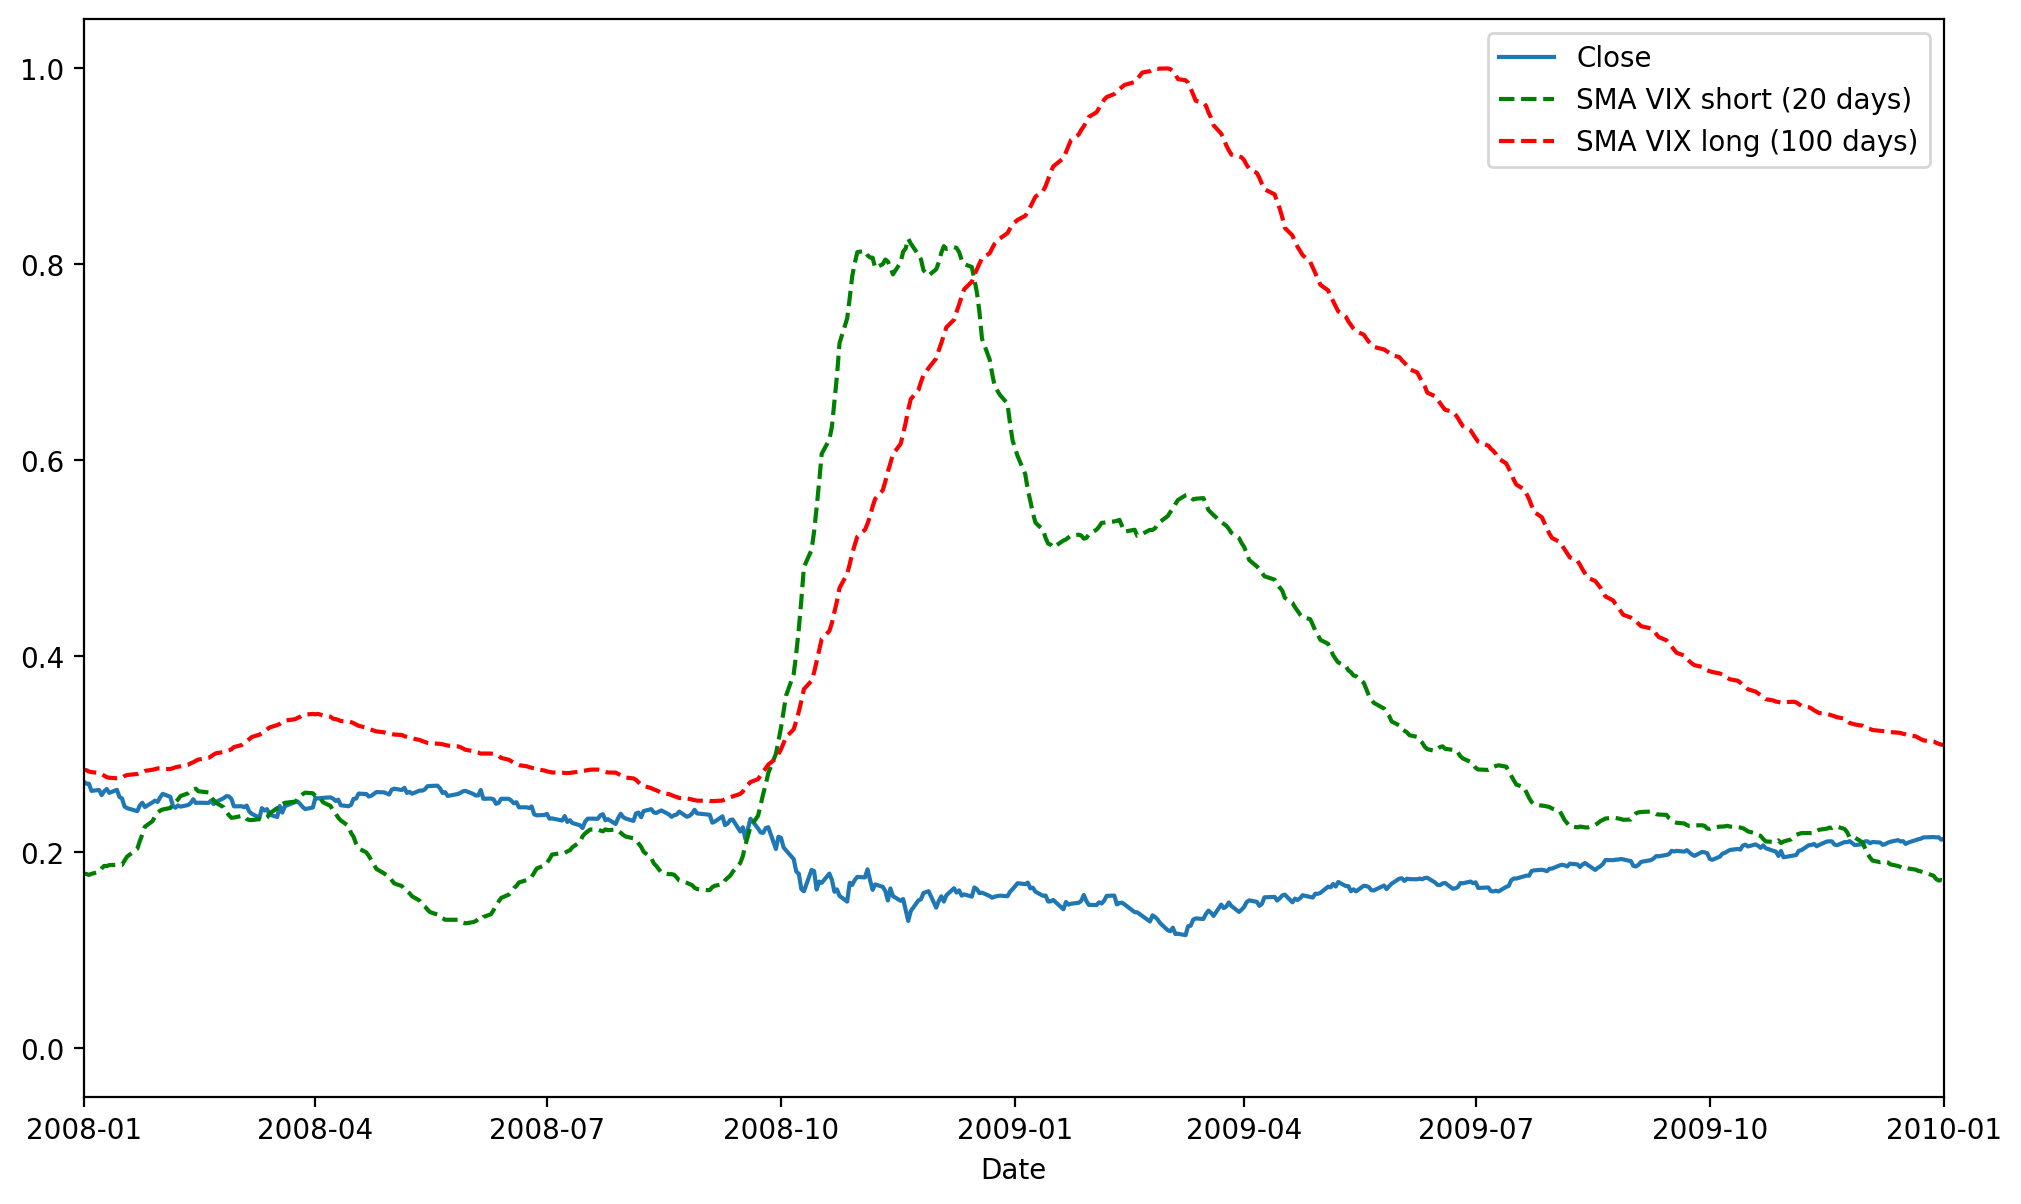

In [26]:
# Для получения сигналов к покупке и продаже активов на основе VIX, используем метод пересичения длинной и короткой скользящей средней SMA (Можно улучшить)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
plt.figure(figsize=(12, 7), dpi=200)


# Рассчитываем короткую и длинную скользящие по VIX_Close
short_window= 20
long_window = 100

data['SMA_VIX_short'] = data['VIX_Close'].rolling(window=short_window, min_periods=1).mean()
data['SMA_VIX_long'] = data['VIX_Close'].rolling(window=long_window, min_periods=1).mean()


mm = MinMaxScaler()
scale_data = mm.fit_transform(data[['Close', 'SMA_VIX_short', 'SMA_VIX_long']]).transpose()

sns.lineplot(data=data, x=data.index, y=scale_data[0], label='Close')
sns.lineplot(data=data, x=data.index, y=scale_data[1], label=f'SMA VIX short ({short_window} days)', color='green', linestyle='--')
sns.lineplot(data=data, x=data.index, y=scale_data[2], label=f'SMA VIX long ({long_window} days)', color='red', linestyle='--')


plt.xlim((datetime(2008, 1, 1), (datetime(2010, 1, 1))))
# plt.ylim((0,0.3));
data
# ОКНА 20 и 100 дней рассмотреть в модели!!
# Стандартно используется 20 и 50

In [27]:
# Добавим сигналы к покупке и продажи исходя из созданных скользящих
# - Когда короткая скользящая пересикает длинную снизу вверх - сигнал на повышения волатильности (продавать)
# - Когда короткая скользящая пересикает длинную сверхну внзи - сигнал на снижение волатильности (покупать)

data['Signal'] = 0

short_up = False
for date in data.index:
    if not short_up and data.at[date, 'SMA_VIX_short'] > data.at[date, 'SMA_VIX_long']:    # Sell
        data.at[date, 'Signal'] = 2
        short_up = True
    elif short_up and data.at[date, 'SMA_VIX_short'] < data.at[date, 'SMA_VIX_long']:    # Bye
        data.at[date, 'Signal'] = 1
        short_up = False

data.loc[data['Signal'] != 0]['Signal'].count()

204

(14061.0, 14853.0)

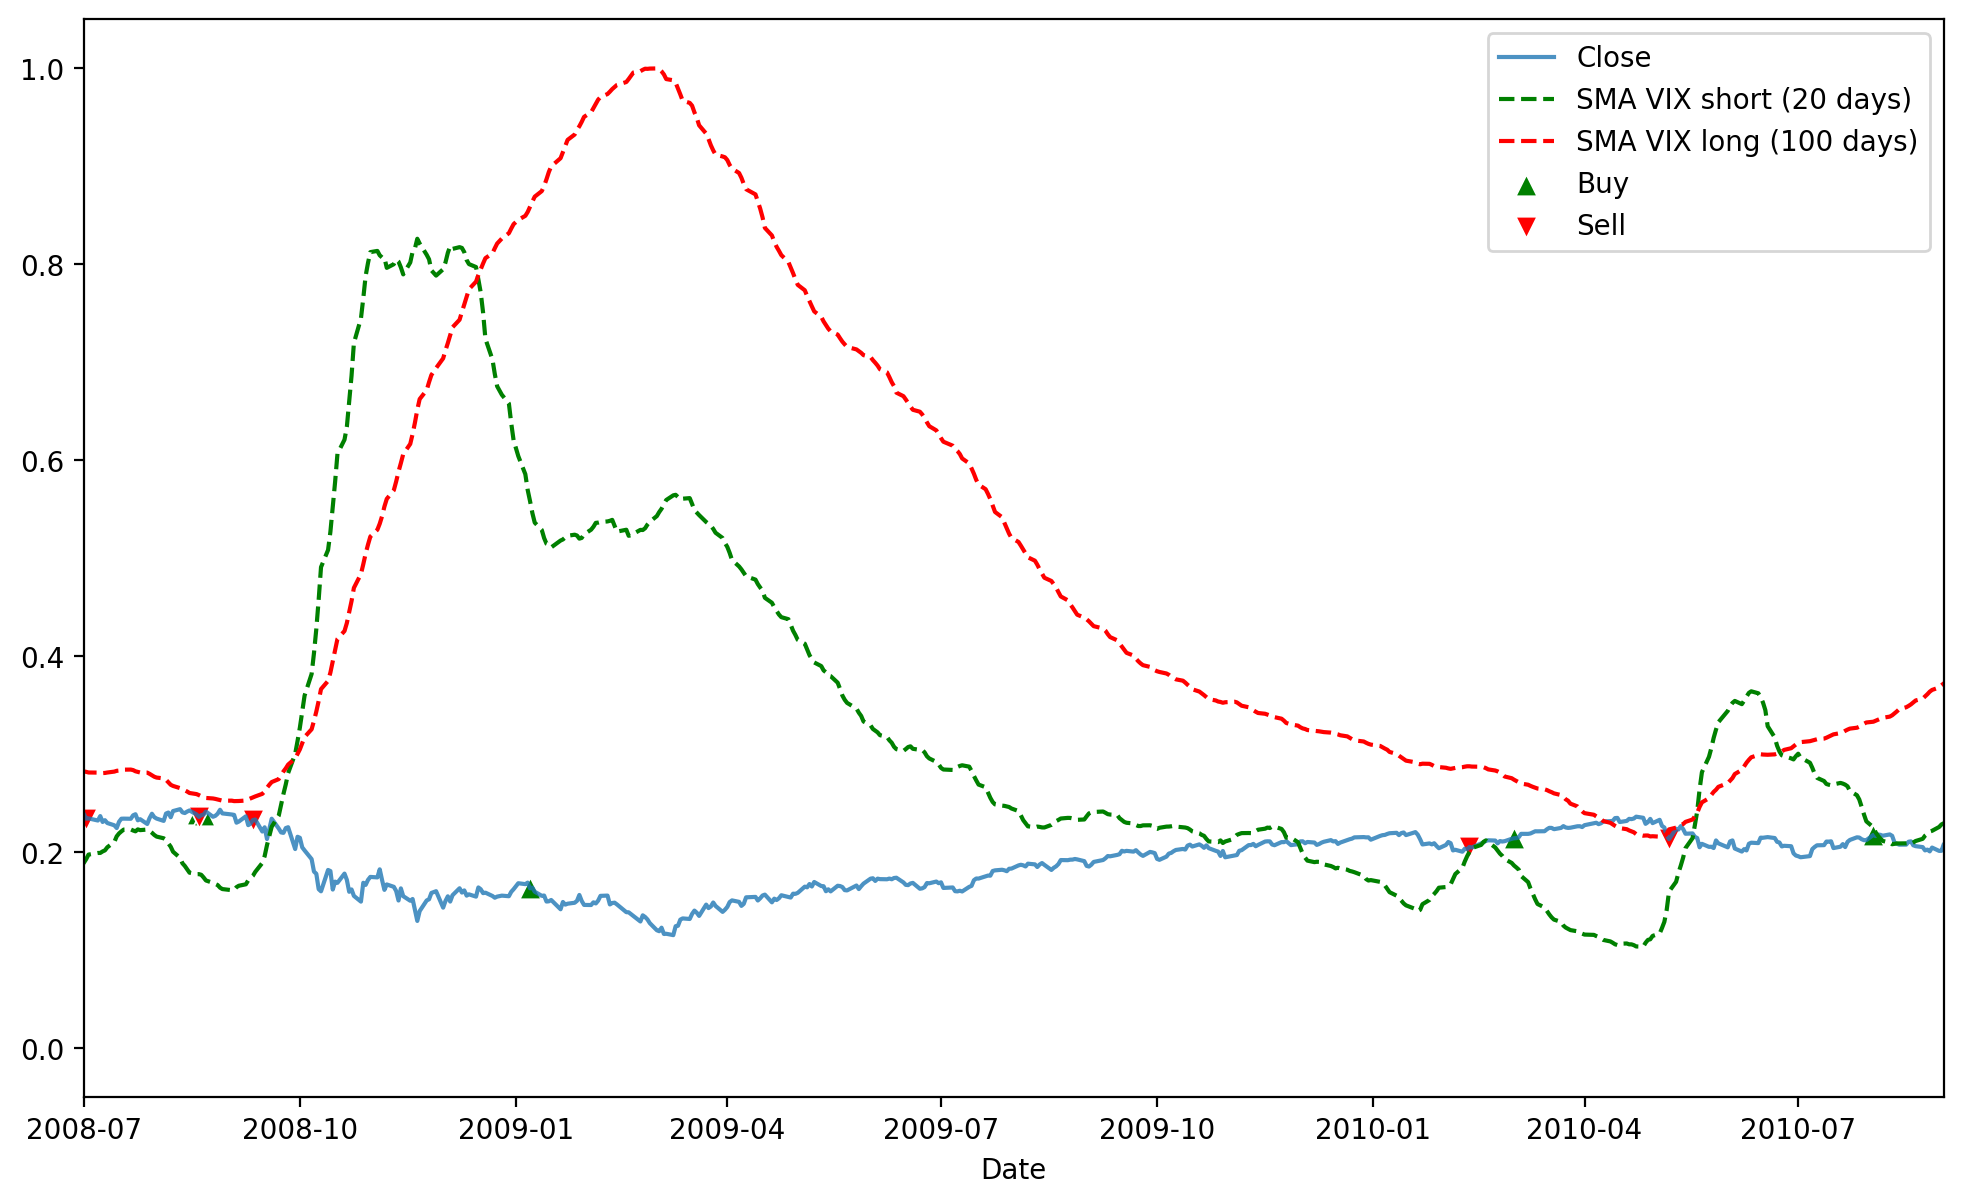

In [28]:
# Покажем сигналы на графике
from sklearn.preprocessing import MinMaxScaler
plt.figure(figsize=(12, 7), dpi=200)

signal_bye_df = data.loc[data['Signal'] == 1]
signal_sell_df = data.loc[data['Signal'] == 2]

mm = MinMaxScaler()
scale_data = mm.fit_transform(data[['Close', 'SMA_VIX_short', 'SMA_VIX_long']]).transpose()
scale_signal_buy = mm.transform(signal_bye_df[['Close', 'SMA_VIX_short', 'SMA_VIX_long']]).transpose()
scale_signal_sell = mm.transform(signal_sell_df[['Close', 'SMA_VIX_short', 'SMA_VIX_long']]).transpose()




# Показываем Close, Signal
# sns.lineplot(data=data, x=data.index, y='Close', alpha=0.8)
# sns.scatterplot(data=signal_bye_df, x=signal_bye_df.index, y='Close', color='green', label='Buy', s=60, marker='^')
# sns.scatterplot(data=signal_sell_df, x=signal_sell_df.index, y='Close', color='red', label='Sell', s=60, marker='v')


# Показываем Close, SMA, Signal
sns.lineplot(data=data, x=data.index, y=scale_data[0], label='Close', alpha=0.8)
sns.lineplot(data=data, x=data.index, y=scale_data[1], label=f'SMA VIX short ({short_window} days)', color='green', linestyle='--')
sns.lineplot(data=data, x=data.index, y=scale_data[2], label=f'SMA VIX long ({long_window} days)', color='red', linestyle='--')
sns.scatterplot(data=signal_bye_df, x=signal_bye_df.index, y=scale_signal_buy[0], label=f'Buy', color='green', s=60, marker='^')
sns.scatterplot(data=signal_sell_df, x=signal_sell_df.index, y=scale_signal_sell[0], label=f'Sell', color='red', s=60, marker='v')

plt.xlim((datetime(2008, 7, 1), (datetime(2010, 9, 1))))
# plt.ylim((25,120));

# Торговая модель
**Стратегия модели - торговля на коротких и длинных скользящих средних рассчитанных по индексу волатильности VIX**

**Цели:**
- Максимизации коэффициента Шарпа путём снижения волатильности, таргет ориентир более 0.6
- Сохранения доходности CAGR на уровне близкому к 10.9%

## Определим класс для симуляции торговли ##

In [29]:
# class TradeSystem():
#     def __init__(self
#                  , investment  # Размер первоначального капитала
#                  , data  # DF Фонда обязательные поля: (Close, Returns, VIX_Close, Dividends)
#                  , start_date: datetime  # Дата начала торгов
#                  , end_date: datetime  # Дата окончания торгов
#                  , SMA_target='VIX_Close'
#                  , SMA_short_window=20  # Размер окна для короткой скользящей
#                  , SMA_long_window=100  # Размер окна для длинной скользящей
#                  , coef_window=0  # Количество дней за которые расчитывать коэффиценты Sharpe, CAGR
#                  , trade_needed=True  # Совершать операции или выбрать стратегию Buy and Hold
#                  , model=None  # Модель для определения решения о покупке, продаже (можно улучшить).
#                  , in_fund=True  # Индикатор того что капитал в Фонде.
#                  , trade_year_coef=0.0002  # Коэффициент умножения на SMA в случае если мы не торговали в течении года.
#                  ):

#         # use ceof_window=0 if you want to calculate coefficient by the whole DF
#         self.investment = investment
#         self.data = data
#         self.start_date, self.end_date = start_date, end_date
#         self.current_date = start_date

#         # Для простоты расчёта инициируем стоимость портфеля с закрытия
#         self.portfolio = pd.DataFrame(index=[start_date]
#                                       , data={'Close_Port': float(investment)
#                 , 'Returns': float(0)
#                 , 'Sharpe_Ratio': float(0)
#                 , 'Trade_ind': 0})

#         # exit_coef - коэфициент выхода из фонда, увеличивается по мере приближения к end_date
#         self.trade_year_coef, self.year_current, self.exit_coef = trade_year_coef, 1, 1
#         self.no_trade_days, self.trade_needed = 8, trade_needed
#         self.SMA_target = SMA_target
#         self.data[f'Short_SMA_{SMA_target}'] = self.data[SMA_target].rolling(SMA_short_window).mean()
#         self.data[f'Long_SMA_{SMA_target}'] = self.data[SMA_target].rolling(SMA_long_window).mean()
#         self.data['Long_SMA_Close'] = self.data['Close'].rolling(SMA_long_window).mean()
#         self.short_up = not in_fund
#         self.in_fund = in_fund
#         self.model = model
#         self.coef_window = coef_window

#     def start_trade(self):
#         while self.current_date < self.end_date:
#             self.current_date += timedelta(days=1)
#             if self.current_date in self.data.index:  # Когда расчётный день - торговый
#                 self.calculate_daily_result(self.current_date)
#                 if self.trade_needed:
#                     self.trade()

#     def calculate_daily_result(self, date):
#         data_row = self.data.loc[date]
#         prev_data_row = self.data.shift(1)
#         new_port_row = self.portfolio.iloc[-1].copy()
#         dividends = new_port_row['Close_Port'] / (
#             prev_data_row.loc[date]['Close'] if pd.notnull(prev_data_row['Close'].loc[date]) else 1) * \
#                     (prev_data_row['Dividends'].loc[date] if pd.notnull(
#                         prev_data_row['Dividends'].loc[date]) else 0)

#         if self.no_trade_days > 0 and self.in_fund:  # Не было операций и деньги в фонде
#             new_port_row['Close_Port'] = new_port_row['Close_Port'] * (1 + data_row['Returns']) + dividends
#             new_port_row['Returns'] = (new_port_row['Close_Port'] / self.portfolio.iloc[-1]['Close_Port']) - 1
#             new_port_row['Trade_ind'] = 0
#             new_port_row.name = date
#             self.portfolio = pd.concat([self.portfolio, new_port_row.to_frame().T])

#         elif self.no_trade_days > 0 and not self.in_fund:  # Не было операций и деньги в кэше
#             new_port_row['Trade_ind'] = 0
#             new_port_row.name = date
#             self.portfolio = pd.concat([self.portfolio, new_port_row.to_frame().T])

#         elif self.in_fund:  # Когда была покупка
#             new_port_row['Trade_ind'] = 1
#             new_port_row.name = date
#             self.portfolio = pd.concat([self.portfolio, new_port_row.to_frame().T])

#         elif not self.in_fund:  # Когда была продажа
#             new_port_row['Close_Port'] = new_port_row['Close_Port'] + dividends
#             new_port_row['Returns'] = (new_port_row['Close_Port'] / self.portfolio.iloc[-1]['Close_Port']) - 1
#             new_port_row['Trade_ind'] = 2
#             new_port_row.name = date
#             self.portfolio = pd.concat([self.portfolio, new_port_row.to_frame().T])

#     def trade(self):
#         # Для упрощения расчётов используем 100% распределение между фондом и кэшем.
#         if self.no_trade_days > 7:
#             dt = self.current_date
#             if (self.end_date - dt).days < 30:  # Увеличиваем коэффициент выхода из фонда
#                 self.exit_coef += 0.01
#             if 252 - self.no_trade_days < 60:
#                 self.year_current += self.trade_year_coef 
#             else:
#                 self.year_current = 1

#             shrt_sma = self.data.at[dt, f'Short_SMA_{self.SMA_target}'] * self.exit_coef
#             lng_sma = self.data.at[dt, f'Long_SMA_{self.SMA_target}']

#             shrt_sma = shrt_sma * (self.year_current if not self.short_up else 1)
#             lng_sma = lng_sma * (self.year_current if self.short_up else 1)

#             if not self.short_up and shrt_sma > lng_sma and self.in_fund:  # Sell
#                 self.in_fund = False
#                 self.no_trade_days = 0

#             elif self.short_up and shrt_sma < lng_sma and not self.in_fund:  # Bye
#                 self.in_fund = True
#                 self.no_trade_days = 0

#             else:
#                 self.no_trade_days += 1

#             self.short_up = shrt_sma > lng_sma

#         else:
#             self.no_trade_days += 1

#     def calculate_sharpe_ratio(self, portfolio=None):
#         if portfolio is None:
#             portfolio = self.portfolio
#         wind = self.coef_window

#         average_returns = portfolio.iloc[-wind:]['Returns'].mean() * 252
#         std_dev = portfolio.iloc[-wind:]['Returns'].std() * np.sqrt(252)
#         risk_free_rate = self.data.iloc[self.end_date - timedelta(days=252):self.end_date]['DGS10'].mean()

#         return (average_returns - risk_free_rate) / std_dev

#     def calculate_cagr(self, portfolio=None):
#         if portfolio is None:
#             portfolio = self.portfolio
#         elif 'Close_Port' not in portfolio.columns:
#             portfolio.loc[:, 'Close_Port'] = portfolio['Close']
#         wind = self.coef_window

#         portfolio_years = len(portfolio[-wind:]) / 252

#         return (1 + self.get_total_return(portfolio)) ** (1 / portfolio_years) - 1

#     def get_total_return(self, portfolio=None):
#         if portfolio is None:
#             portfolio = self.portfolio
#         elif 'Close_Port' not in portfolio.columns:
#             portfolio.loc['Close_Port'] = portfolio['Close']
#         wind = self.coef_window

#         initial_value = portfolio['Close_Port'].iloc[-wind]
#         final_value = portfolio['Close_Port'].iloc[-1]

#         return (final_value / initial_value) - 1

#     def plt(self, start_year=None, end_year=None):
#         if start_year is None:
#             start_year = self.portfolio.iloc[0].name
#         else:
#             start_year = datetime(start_year, 1, 1)
#         if end_year is None:
#             end_year = self.portfolio.iloc[-1].name
#         else:
#             end_year = datetime(end_year, 1, 1)

#         data = self.data.loc[start_year:end_year + timedelta(days=1)]
#         data_cagr = self.calculate_cagr(data)
#         data_sharpe = self.calculate_sharpe_ratio(data)

#         print('CAGR Trade System:', self.calculate_cagr())
#         print('SHARP Trade System:', self.calculate_sharpe_ratio())
#         print('Total Trade System returns:', self.get_total_return())
#         print('Count trades:', self.portfolio.loc[self.portfolio['Trade_ind'] != 0]['Trade_ind'].count())
#         print('Current state in cash:', not self.in_fund)
#         print()
#         print('CAGR Fund without div:', data_cagr)
#         print('Sharpe with div:', data_sharpe)

#         plt.figure(figsize=(12, 6), dpi=200)
#         signal_bye_df = self.portfolio.loc[self.portfolio['Trade_ind'] == 1]
#         signal_sell_df = self.portfolio.loc[self.portfolio['Trade_ind'] == 2]

#         sns.lineplot(data=self.portfolio, x=self.portfolio.index, y='Close_Port', alpha=0.8,
#                      label='Portfolio Close')
#         sns.lineplot(data=data, x=data.index, y=data['Close'], alpha=0.4, label='Fund Close')
#         sns.scatterplot(data=signal_bye_df, x=signal_bye_df.index, y='Close_Port', color='green', label='Buy', s=60,
#                         marker='^')
#         sns.scatterplot(data=signal_sell_df, x=signal_sell_df.index, y='Close_Port', color='red', label='Sell',
#                         s=60, marker='v')
#         plt.xlabel('Date')
#         plt.ylabel('Close Price')

#         plt.xlim((start_year, (end_year)))
#         # plt.show()


## Поиск оптимальных параметров для скользящих средних

CAGR Trade System: 0.08327362054177834
SHARP Trade System: 0.3926974477486405
Total Trade System returns: 15.50547058668009
Count trades: 191
Current state in cash: True

CAGR Fund: 0.1072759362743354
Sharpe ratio with div Fund: 0.5744863699581622


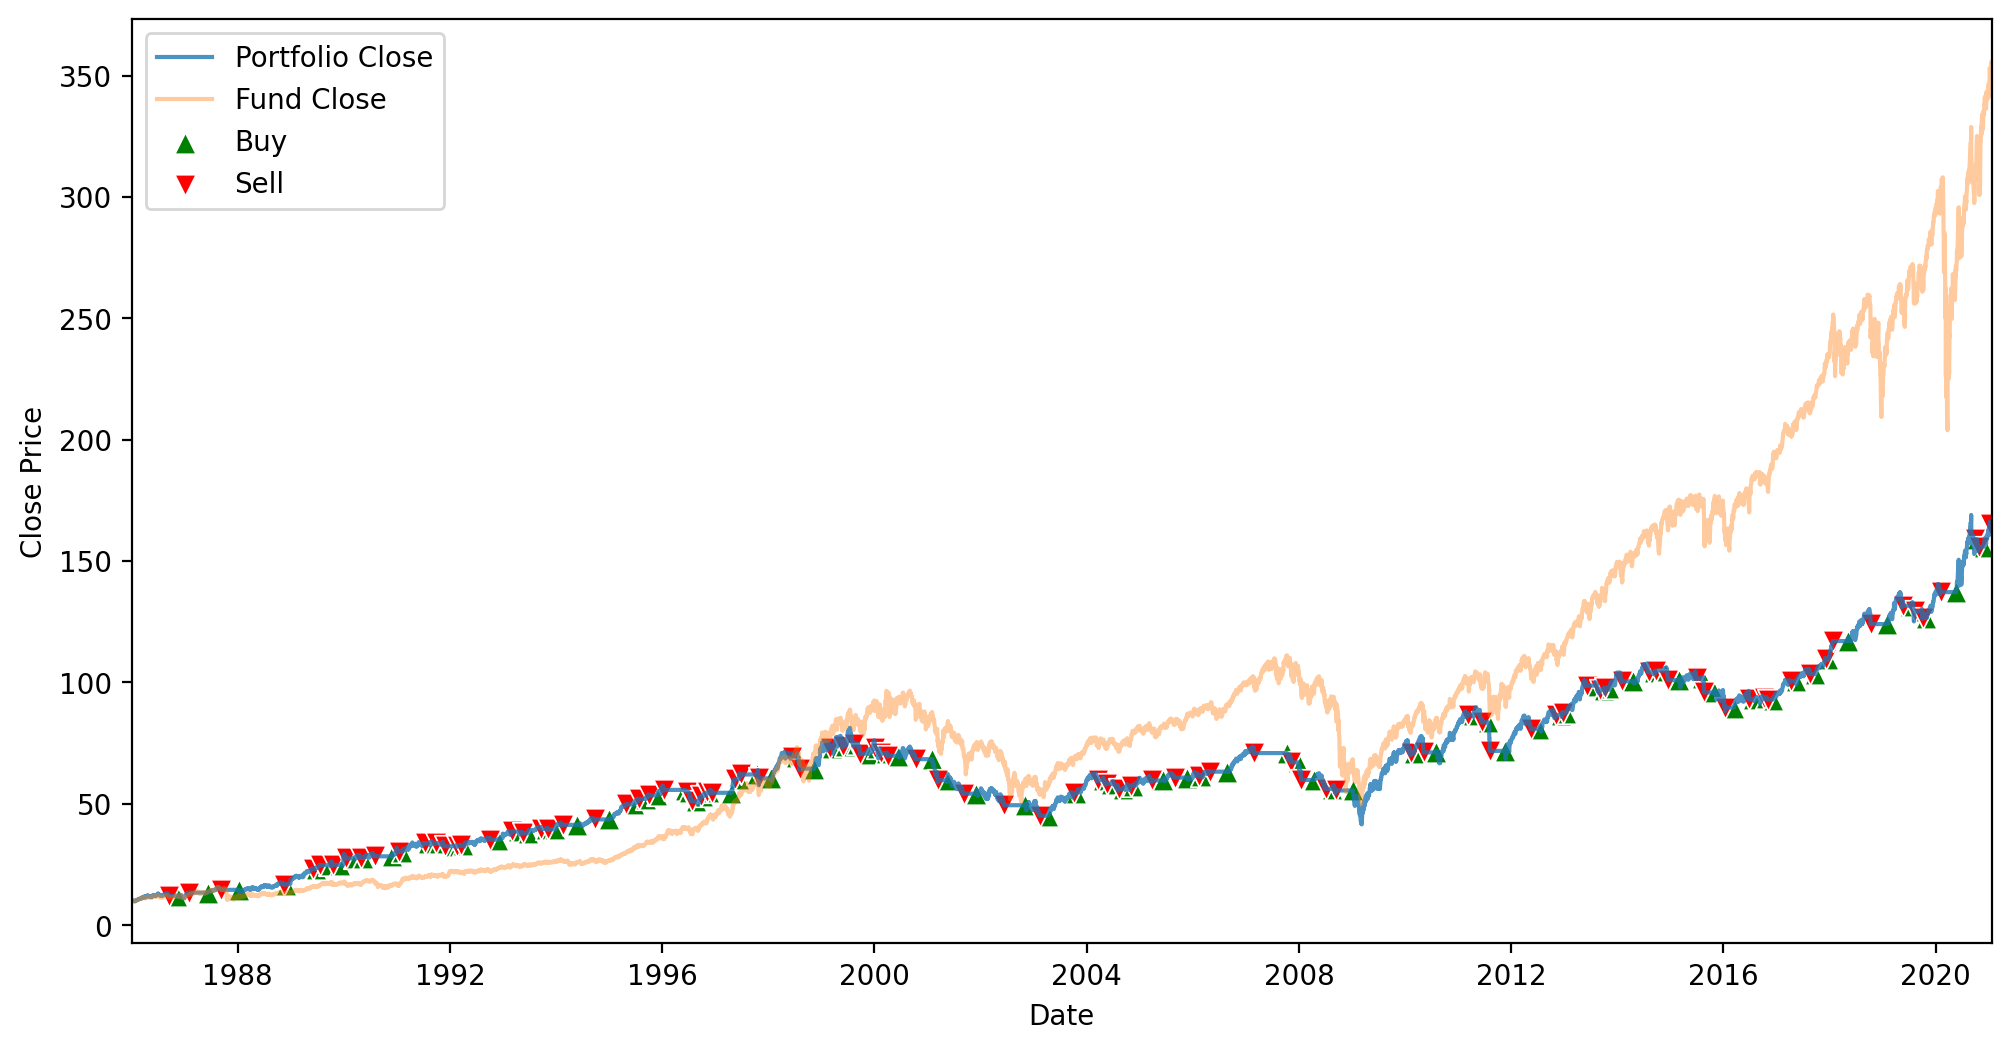

In [30]:
from trade_system import TradeSystem

TS = TradeSystem(10, data, datetime(1986, 1, 2), datetime(2021, 1, 22), SMA_short_window=20, SMA_long_window=100, trade_year_coef=0.0002)
TS.start_trade()
TS.plt()

print()
print('CAGR Fund:', TS.calculate_cagr(data))
print('Sharpe ratio with div Fund:', TS.calculate_sharpe_ratio(data))
# Из графика видно что SMA 20 и 10, отлично показывают себя на участке до 1997 года.
# Но на сотальном отркзке значения система с худшим результатом относительно фонда

In [31]:
ByeAndHold = TradeSystem(10, data, datetime(1986, 1, 2), datetime(2021, 1, 22), trade_needed=False)
ByeAndHold.start_trade()

CAGR Trade System: 0.19016593782627655
SHARP Trade System: 0.7502332991668583
Total Trade System returns: 445.85176071746446
Count trades: 0
Current state in cash: False

Sharpe with div: 0.5744863699581622
CAGR without div: 0.1072759362743354


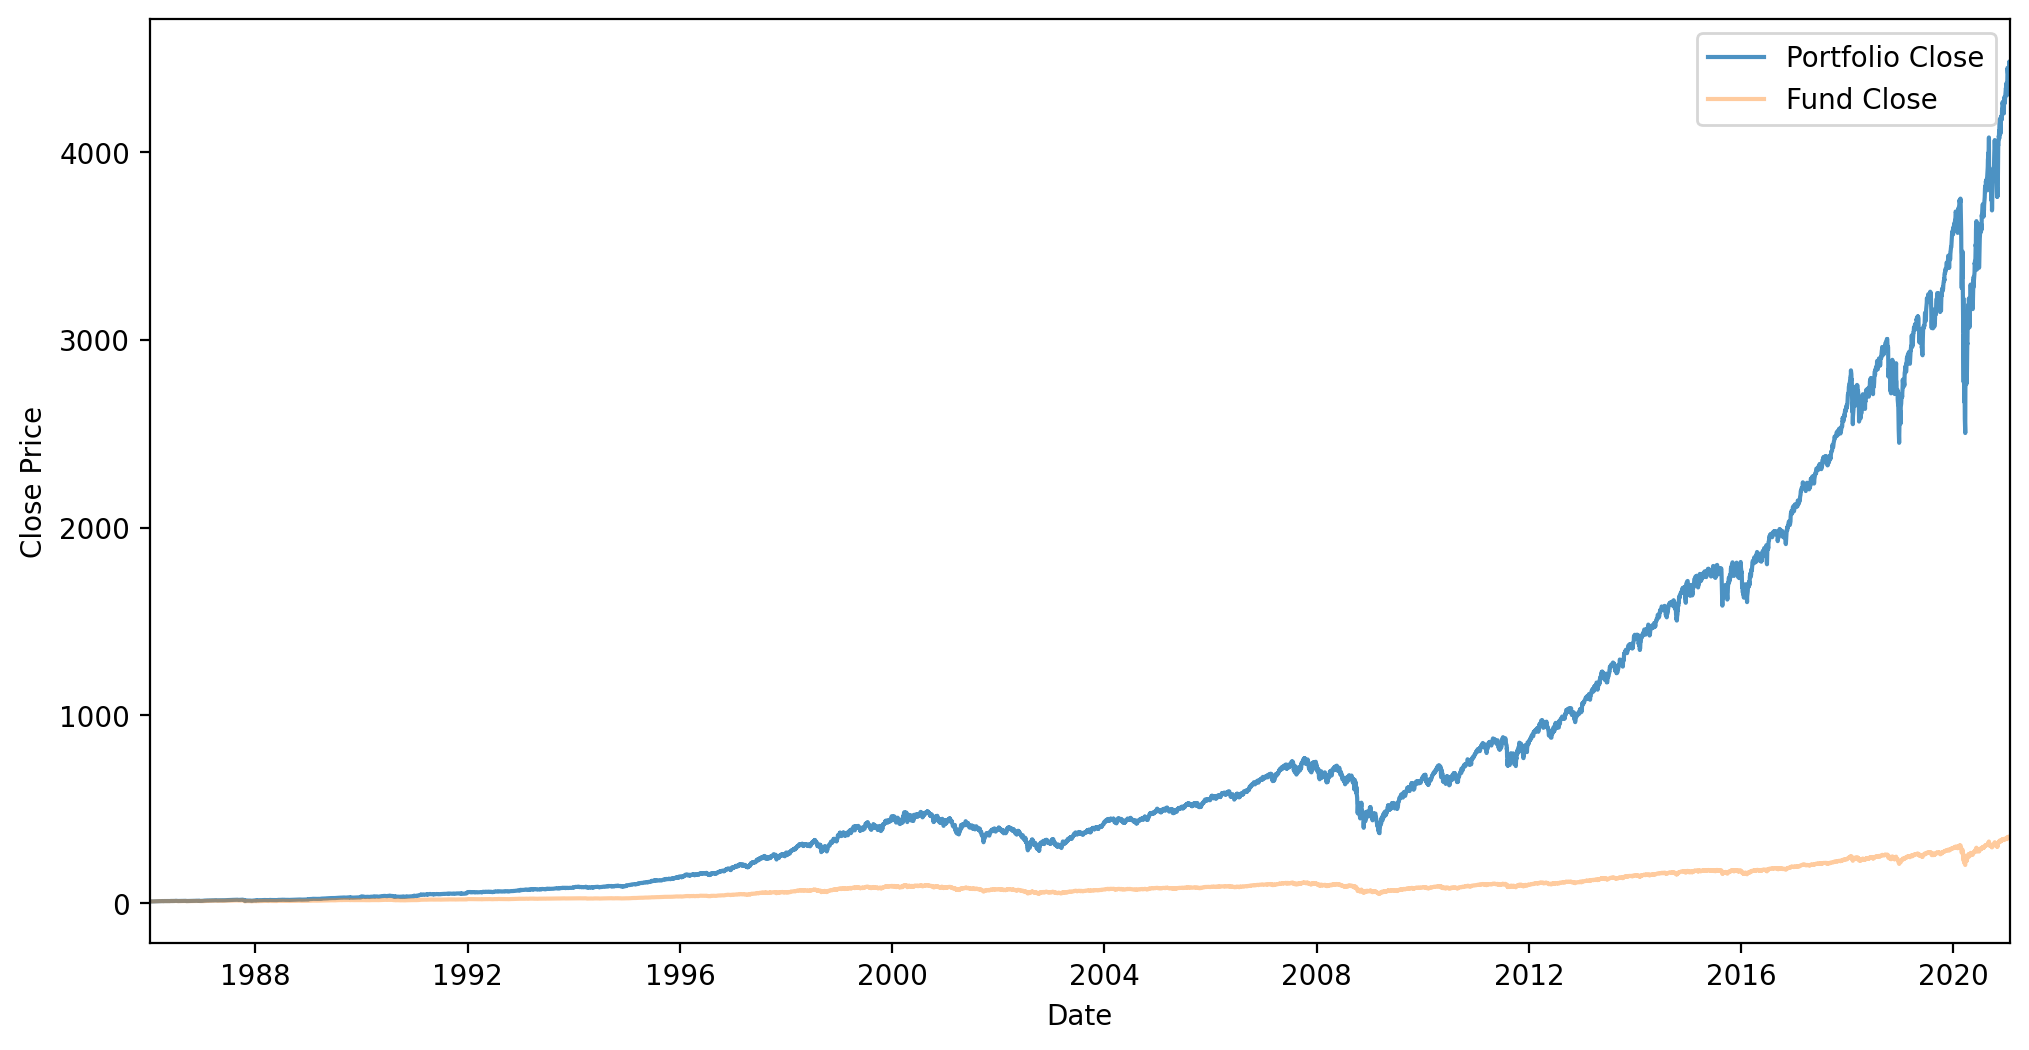

In [32]:
ByeAndHold.plt()
# Подтверждаем что стратегия Buy And Hold без дивидендов даёт коэффициент Шарпа = 0.57, и CAGR = 0.107
# При этом Buy And Hold с учётом реинвестирования дивидендов даёт коэффициент Шарпа = 0.75, и CAGR = 0.19

print()
print('Sharpe with div:', ByeAndHold.calculate_sharpe_ratio(data))
print('CAGR without div:', ByeAndHold.calculate_cagr(data))

Исходя из того что нужно доказать, что система высоковероятно **будет работоспособна ближайшее десятилетие, устойчива и стабильно работает на различных временных периодах и рыночных состояниях,** разобьём данны на trade и тестовые наборы.
Для тестовых периодов возьмём 3 разных состояния рынка. Бычий, Медвежий и Флэт

Для trade df возьмём данные по фонду с 1996 по 2016, тестовые данные выберем исходя из разных рыночных состояний.
Возрастающий тренд (Bull Period 2016-)
Снижающийся тренд (Bear Period 2008-2009)
Плоский тренд (Flat Period 1998-2003)

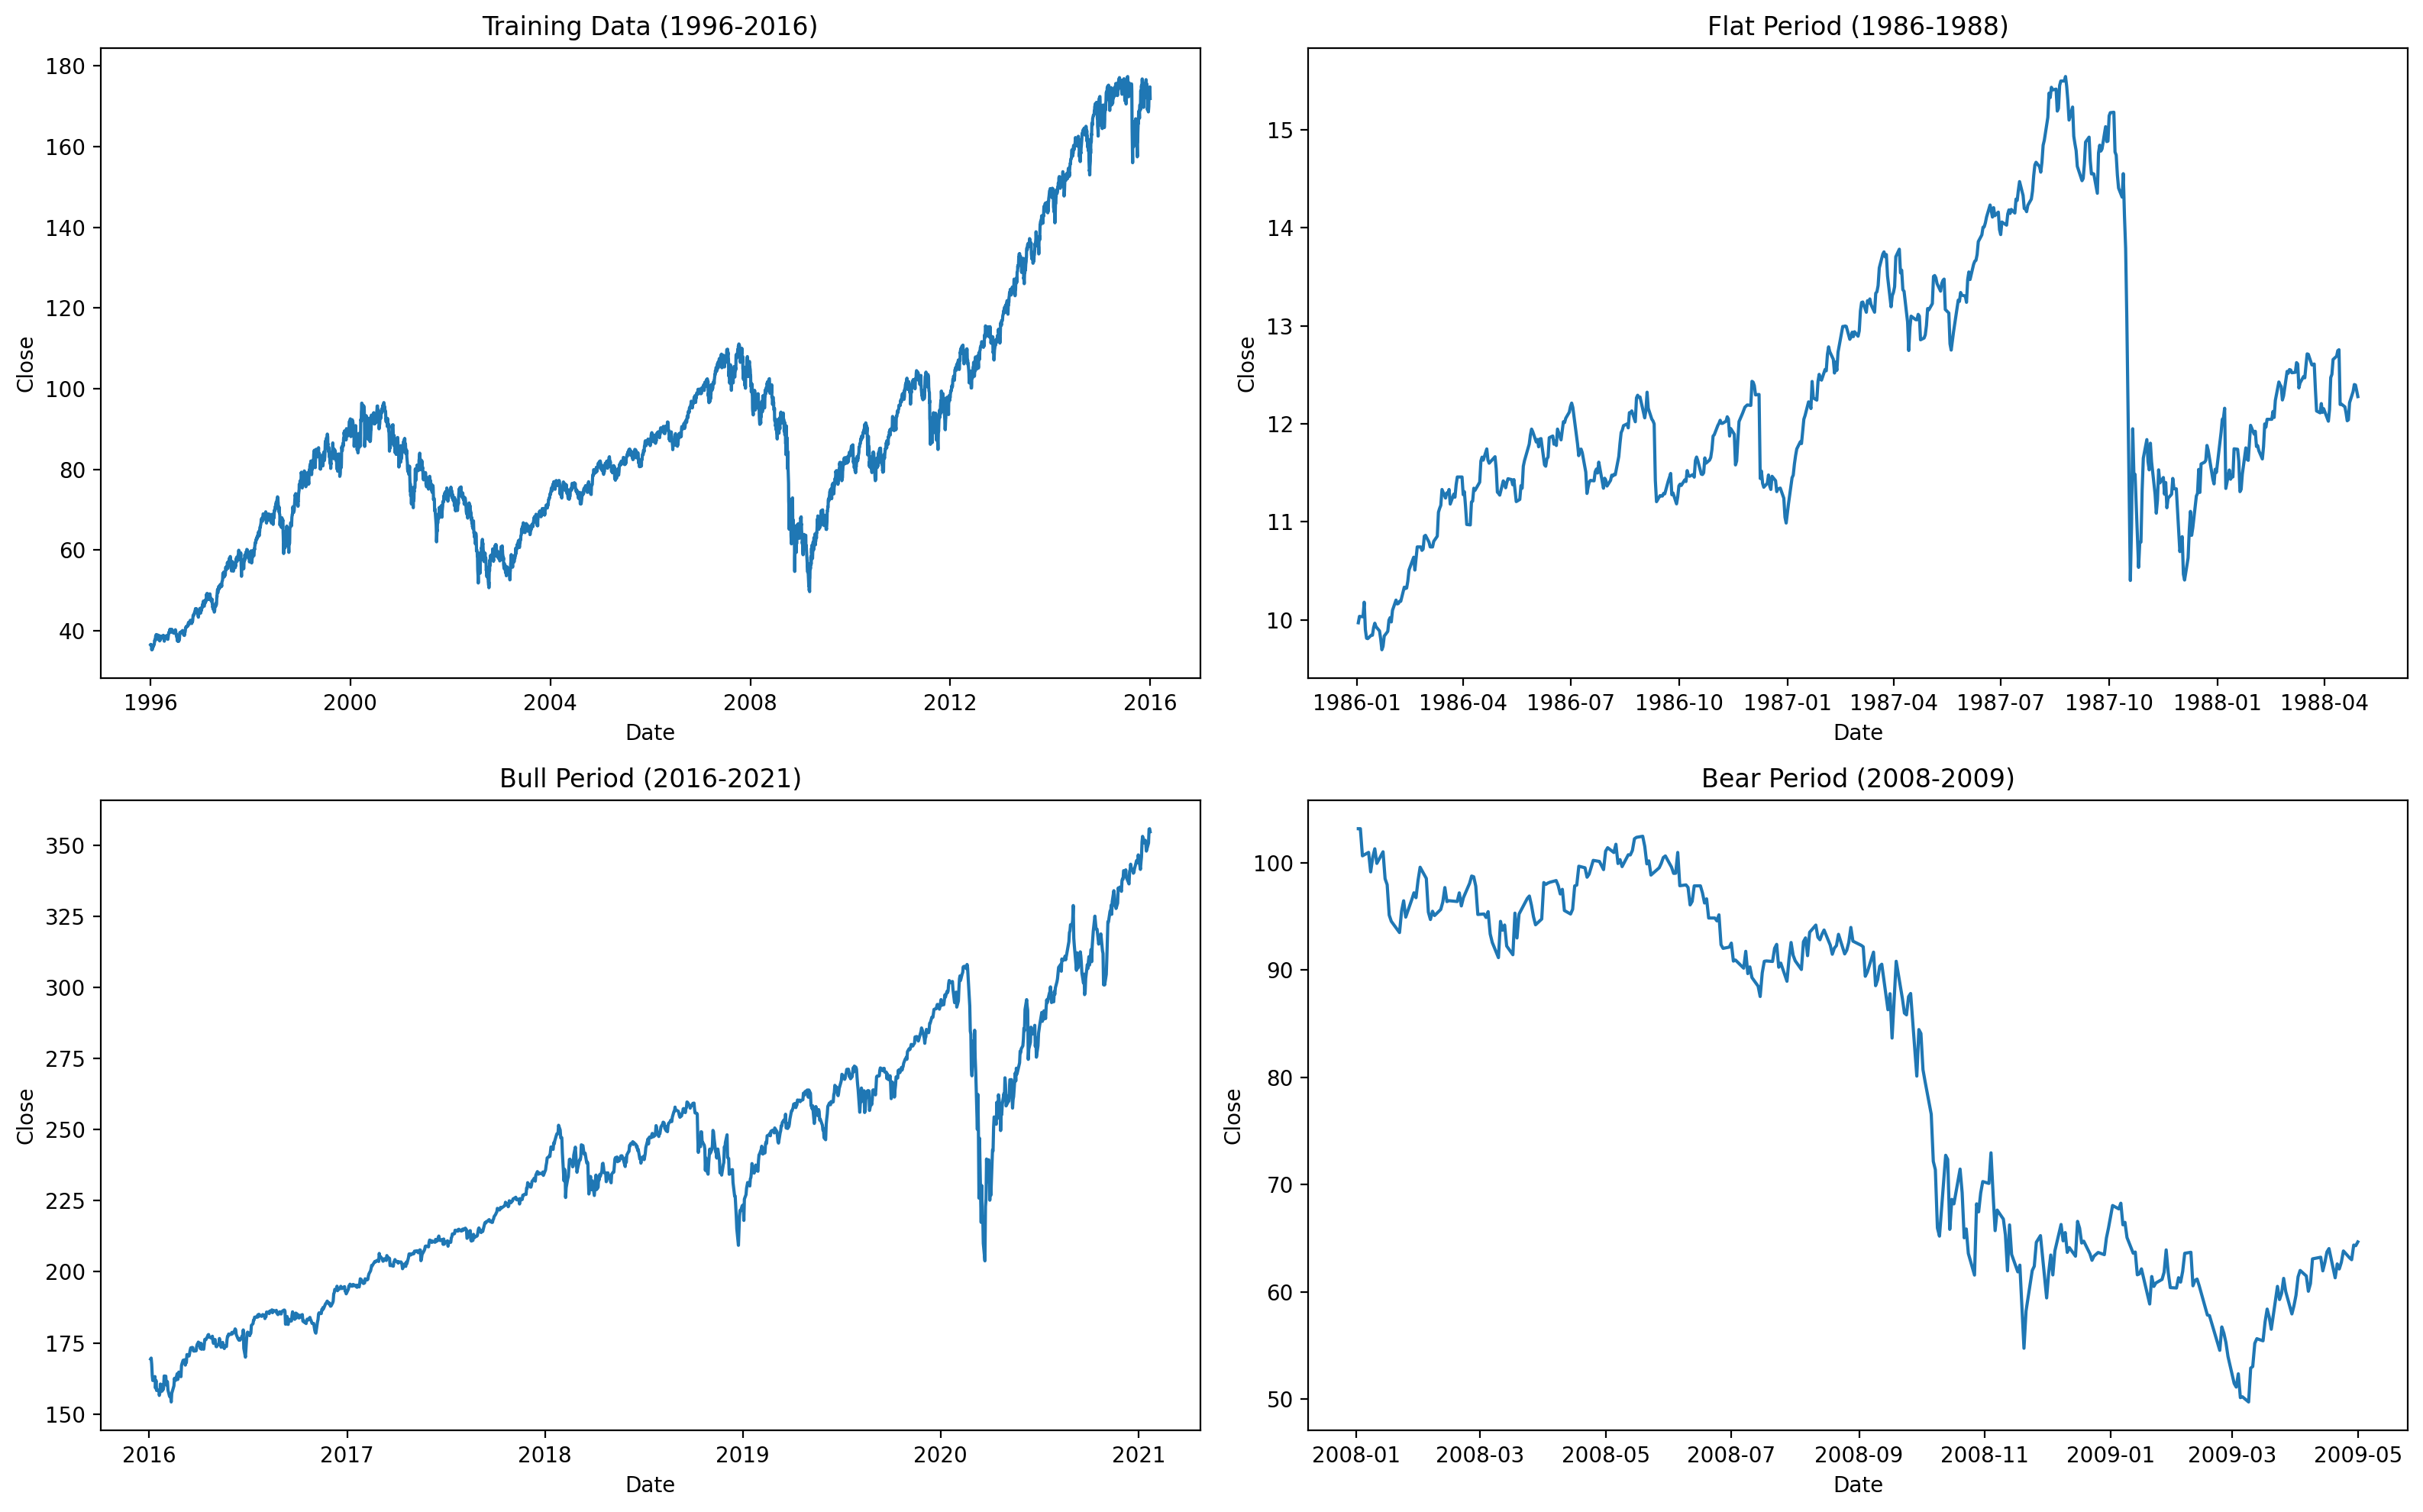

In [34]:
train_df = data.copy().loc[datetime(1996, 1, 1):datetime(2016, 1, 1)]
test_df_flat = data.copy().loc[datetime(1986, 1, 1):datetime(1988, 5, 1)]
test_df_bull = data.copy().loc[datetime(2016, 1, 1):]
test_df_bear = data.copy().loc[datetime(2008, 1, 1):datetime(2009, 5, 1)]



fig, axs = plt.subplots(2, 2, figsize=(16, 10), dpi=200)


sns.lineplot(data=train_df, x=train_df.index, y=train_df['Close'], ax=axs[0, 0])
axs[0, 0].set_title('Training Data (1996-2016)')

sns.lineplot(data=test_df_flat, x=test_df_flat.index, y=test_df_flat['Close'], ax=axs[0, 1])
axs[0, 1].set_title('Flat Period (1986-1988)')

sns.lineplot(data=test_df_bull, x=test_df_bull.index, y=test_df_bull['Close'], ax=axs[1, 0])
axs[1, 0].set_title('Bull Period (2016-2021)')

sns.lineplot(data=test_df_bear, x=test_df_bear.index, y=test_df_bear['Close'], ax=axs[1, 1])
axs[1, 1].set_title('Bear Period (2008-2009)')


plt.tight_layout()

In [42]:
# Подберём параметры для короткой и средней сокльзящей с помощью цикла
# Добавим результаты sharpe и cagr в список для будующего сравнения
from tqdm import tqdm
# train_df
# test_df_flat
# test_df_bull
# test_df_bear

start_date = train_df.iloc[0].name
end_date = train_df.iloc[-1].name

cagr_sharp = []
for short in tqdm([200, 250, 290, 300]):
    for long in tqdm([450, 500, 550, 600]):
        TS = TradeSystem(10, data, start_date, end_date, SMA_short_window=short, SMA_long_window=long)
        TS.start_trade()
        cagr = TS.calculate_cagr()
        sharp = TS.calculate_sharpe_ratio()
        result = (f'TS short={short}, long={long}', cagr, sharp)
        
        cagr_sharp.append(result)


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:00<00:00, 60.06s/it]


In [35]:
print(sorted(cagr_sharp, key=lambda x: (x[-1], x[-2]), reverse=True)[:20])

# TS short=90, long=280', 0.055894425924842395, 0.6964936128209062
# 'TS short=200, long=500', 0.09439977359889218, 3.3868061405607865   !!!!!
# ('TS short=290, long=500', 0.06950326267473517, 3.1684555518920696)

NameError: name 'cagr_sharp' is not defined

CAGR Trade System: 0.0654328136723552
SHARP Trade System: 2.5210718365018137
Total Trade System returns: 2.5470391535177996
Count trades: 27
Current state in cash: True

Sharpe Fund with div: 0.40784289026918924
CAGR Fund without div: 0.08052784117853151


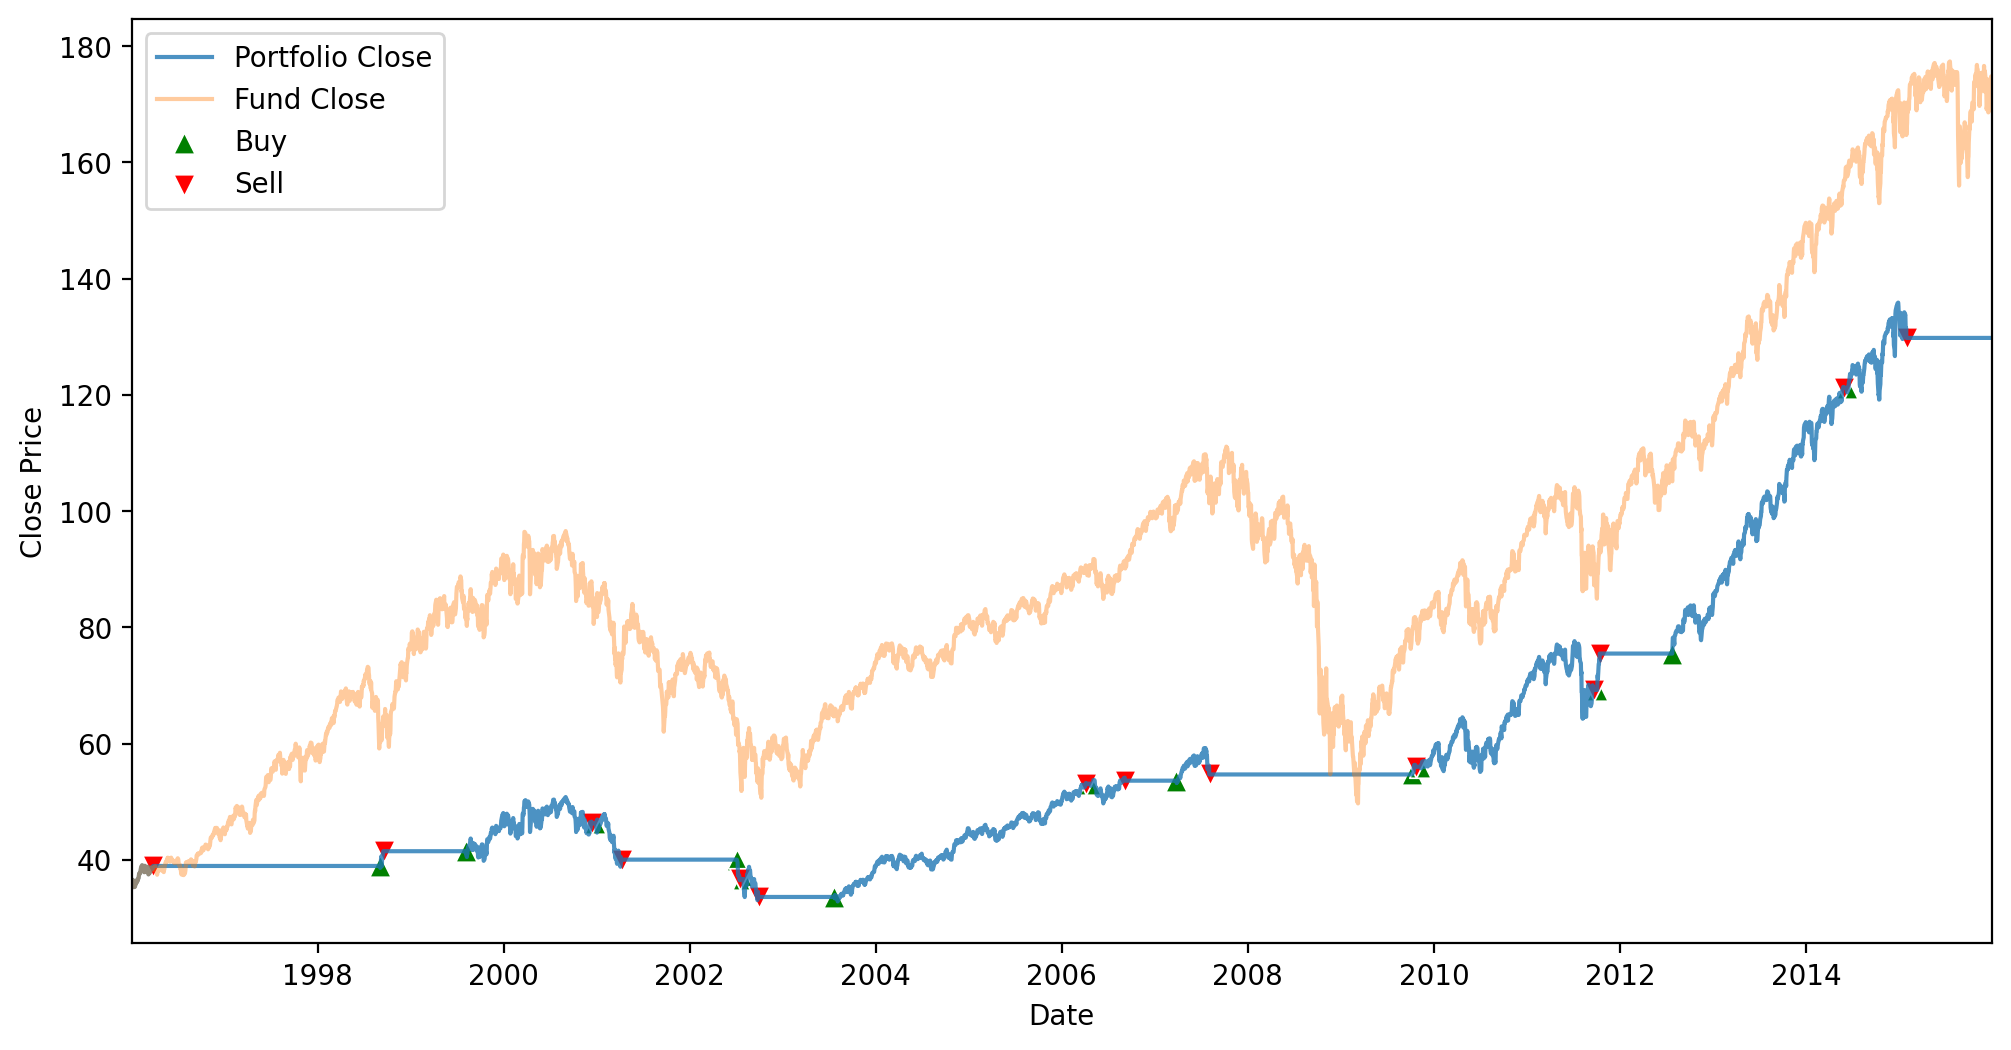

In [36]:
# Проверим условия найденные парамметры ещё раз.
start_date = train_df.iloc[0].name
end_date = train_df.iloc[-1].name
start_investment = train_df.iloc[0]['Close']

TS = TradeSystem(start_investment, data, start_date, end_date, trade_needed=True, SMA_long_window=500, SMA_short_window=200)
TS.start_trade()
TS.plt()

print()
print('Sharpe Fund with div:', TS.calculate_sharpe_ratio(train_df))
print('CAGR Fund without div:', TS.calculate_cagr(train_df))

# Из граффика и данных видно как торговая система сглаживает моменты волатильности на рынке фонад 
# В результате мы добились желаемого результата и выполнили условия: 
# CAGR Trade System: 0.085 > CAGR Fund without div: 0.080
# SHARP Trade System: 3.31 > Sharpe with div: 0.40
# Current state in cash: True



# CAGR Trade System: 0.08588619708746026
# SHARP Trade System: 3.3127312038048307
# Total Trade System returns: 4.186020721965005
# Count trades: 27
# Current state in cash: True

# Sharpe with div: 0.40784289026918924
# CAGR without div: 0.08052784117853151

In [61]:
# data.loc[start_date + timedelta(days=2)]
data.loc[datetime(1986, 1, 4)]

KeyError: datetime.datetime(1986, 1, 4, 0, 0)

In [45]:
# Проверим условие на торговлю не реже одного раза в год:
port = TS.portfolio

port['Years'] = port.index.year
port.groupby(by='Years')['Trade_ind'].sum()
# Условие не выполняются, т.к. в 1998, 2004, 2005, 2010, 2013 годах не было проведено торгов. Для устранения этого, увеличим коэффицент trade_year_coef в торговой системе

Years
1996    0.0
1997    2.0
1998    0.0
1999    4.0
2000    3.0
2001    2.0
2002    6.0
2003    1.0
2004    0.0
2005    0.0
2006    5.0
2007    3.0
2008    0.0
2009    4.0
2010    0.0
2011    5.0
2012    1.0
2013    0.0
2014    3.0
2015    2.0
Name: Trade_ind, dtype: float64

CAGR Trade System: 0.08217223090051085
SHARP Trade System: 2.1195372220059077
Total Trade System returns: 3.84296276235857
Count trades: 47
Current state in cash: True


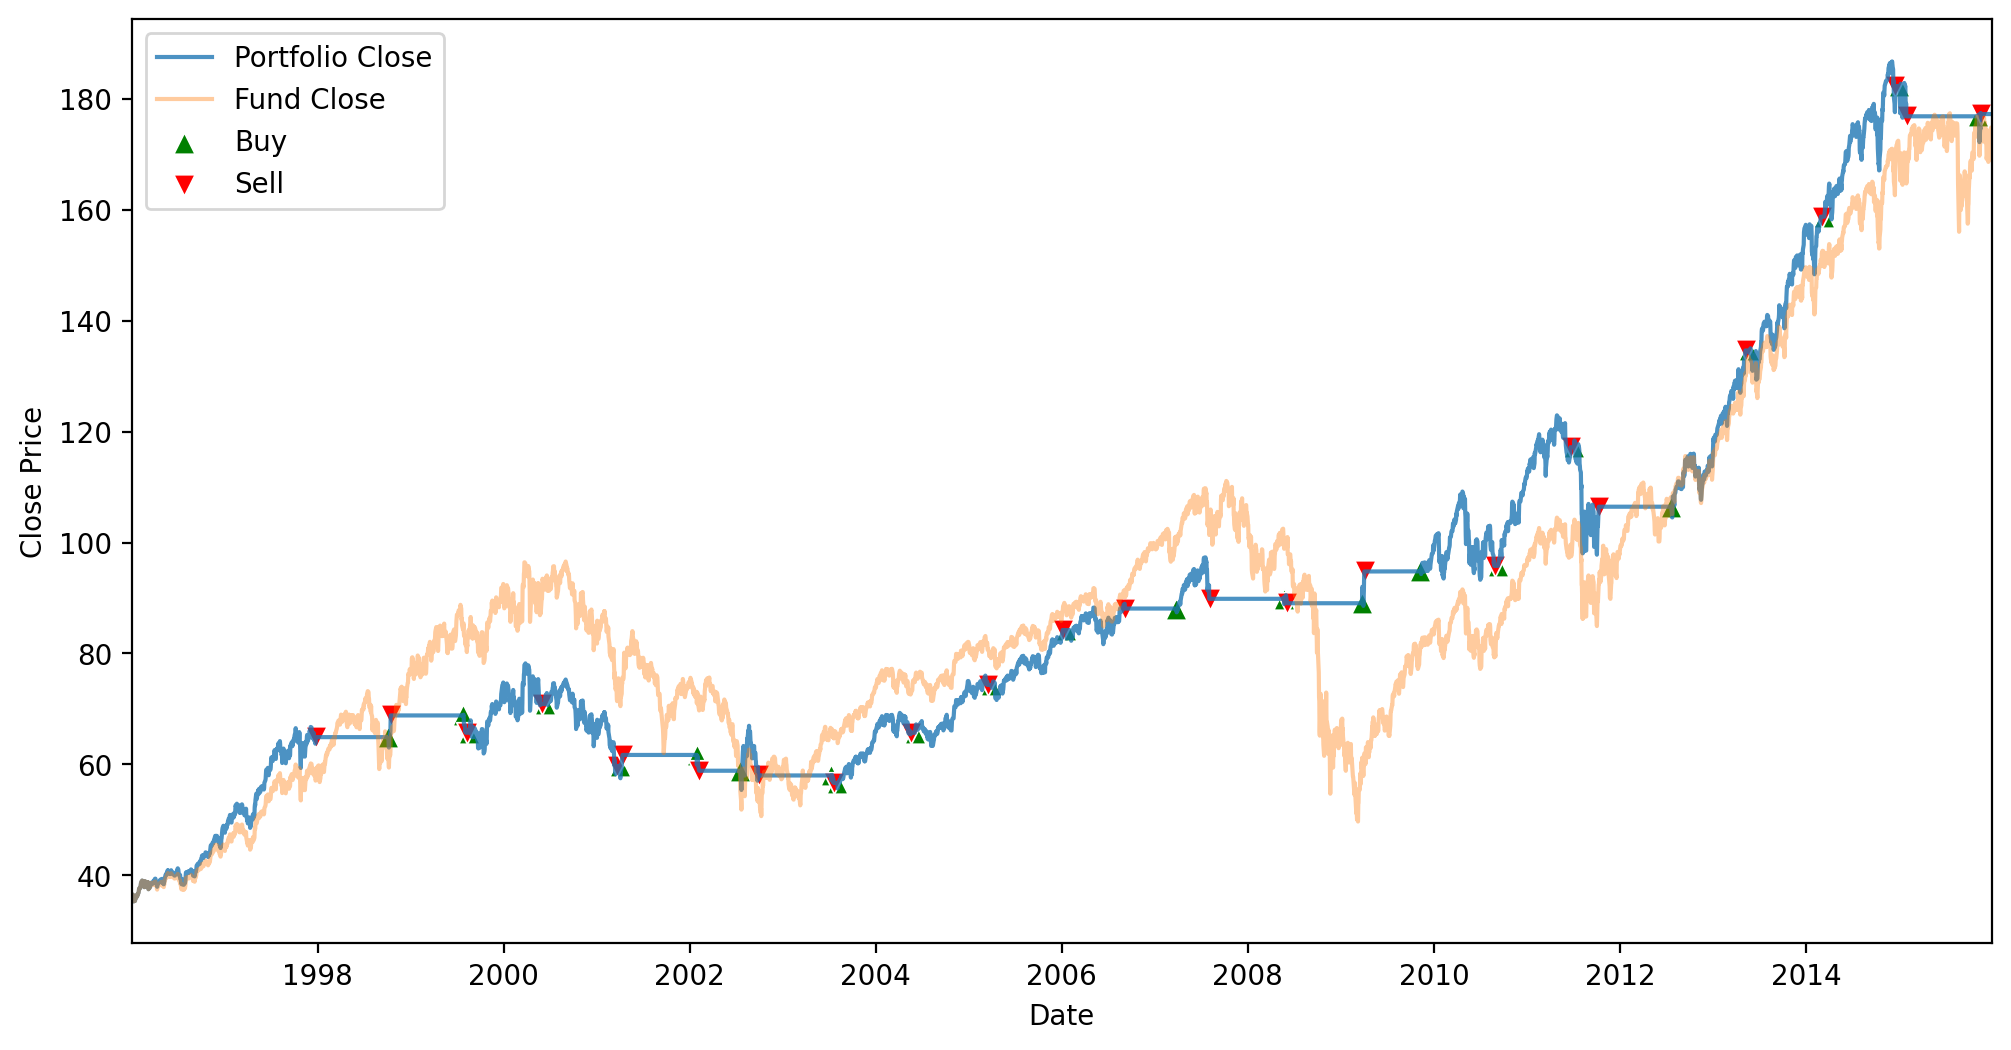

In [46]:
# Проверим условия найденных парамметров ещё раз.
start_date = train_df.iloc[0].name
end_date = train_df.iloc[-1].name
start_investment = train_df.iloc[0]['Close']

TS = TradeSystem(start_investment, train_df, start_date, end_date, trade_needed=True, SMA_long_window=500, SMA_short_window=200, trade_year_coef=0.05)
TS.start_trade()
TS.plt()

# Из граффика и данных видно как торговая система сглаживает моменты волатильности на рынке фонад 
# В результате мы добились желаемого результата и выполнили условия: 
# CAGR Trade System: 0.08217223090051085 > CAGR Fund without div 0.8
# SHARP Trade System: 2.1195372220059077 > Sharpe with div 0.4
# Current state in cash: True

In [140]:
# Ещё раз проверим условие на торговлю не реже одного раза в год:
port = TS.portfolio

port['Years'] = port.index.year
port.groupby(by='Years')['Trade_ind'].sum()
# Мы видим что торговля осущетсвлялясь каждый год за исключенем первого, т.к. (можно улучшить)

Years
1996    0.0
1997    2.0
1998    3.0
1999    4.0
2000    3.0
2001    5.0
2002    6.0
2003    4.0
2004    3.0
2005    3.0
2006    5.0
2007    3.0
2008    3.0
2009    4.0
2010    3.0
2011    5.0
2012    1.0
2013    3.0
2014    5.0
2015    6.0
Name: Trade_ind, dtype: float64

C:\Users\kavab\AppData\Local\Temp\ipykernel_14884\1936310516.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio.loc[:, 'Close_Port'] = portfolio['Close']


CAGR Trade System: -0.2531100971595205
SHARP Trade System: -0.632907596700597
Total Trade System returns: -0.3223447857589161
Count trades: 0
Current state in cash: False

CAGR Fund without div: -0.2958589890738761
Sharpe with div: -0.707956601677932


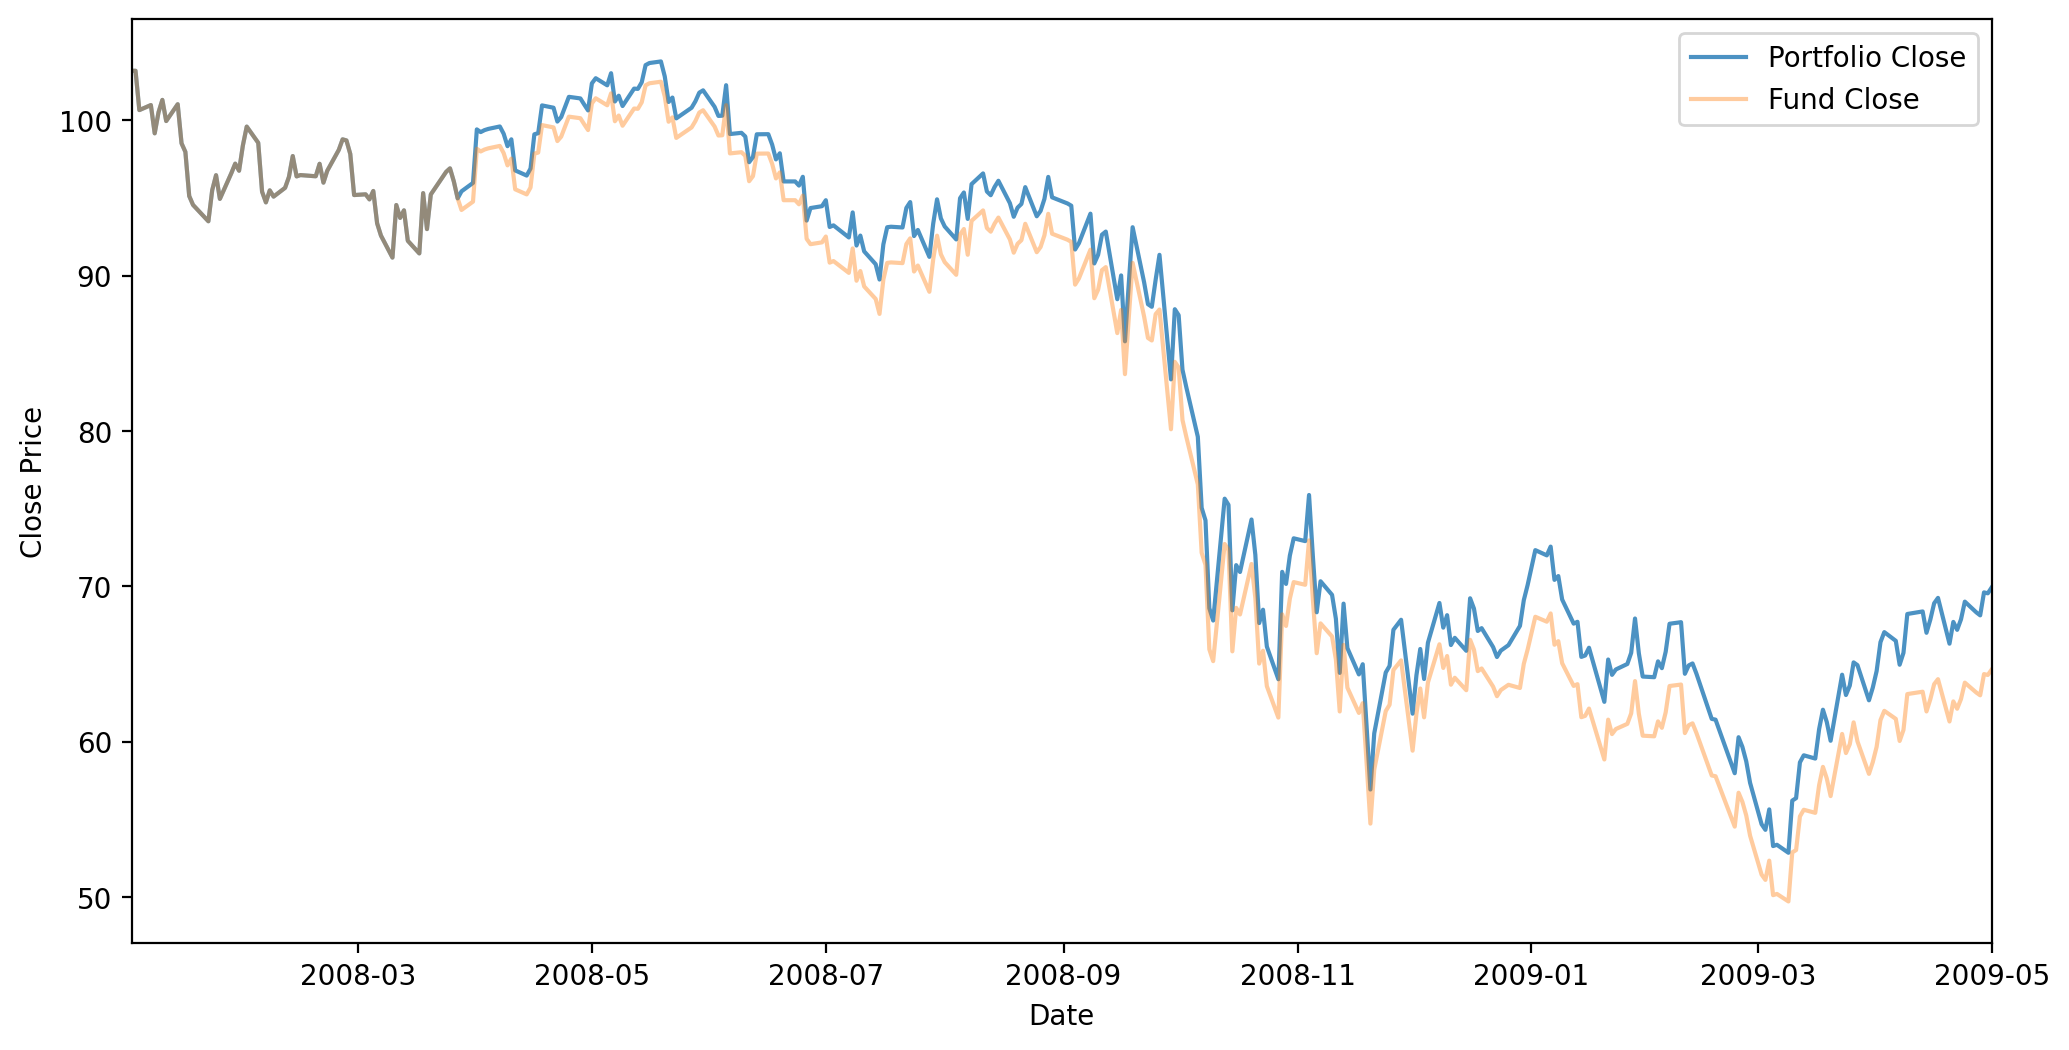

In [156]:
# Проверим работу системы в других условиях:
# Медвежий рынок

start_date = test_df_bear.iloc[0].name
end_date = test_df_bear.iloc[-1].name
start_investment = test_df_bear.iloc[0]['Close']

TS = TradeSystem(start_investment, test_df_bear, start_date, end_date, trade_needed=True, SMA_long_window=500, SMA_short_window=200, trade_year_coef=0.05)
TS.start_trade()
TS.plt()

# Из граффика и данных видно как торговая система сглаживает моменты волатильности на рынке фонад 
# В результате мы добились желаемого результата и выполнили условия: 
# CAGR Trade System: 0.08217223090051085 > CAGR Fund without div 0.8
# SHARP Trade System: 2.1195372220059077 > Sharpe with div 0.4
# Current state in cash: True

C:\Users\kavab\AppData\Local\Temp\ipykernel_15988\470156690.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio.loc[:, 'Close_Port'] = portfolio['Close']


CAGR: 0.08508215464786151
SHARP: 2.1225493129069886
Total returns: 0.5105758123772164
Count trades: 7
Current state in cash: True

CAGR Fund without div: 0.15764521886454186
CAGR Sharpe with div: 0.8374080011132606


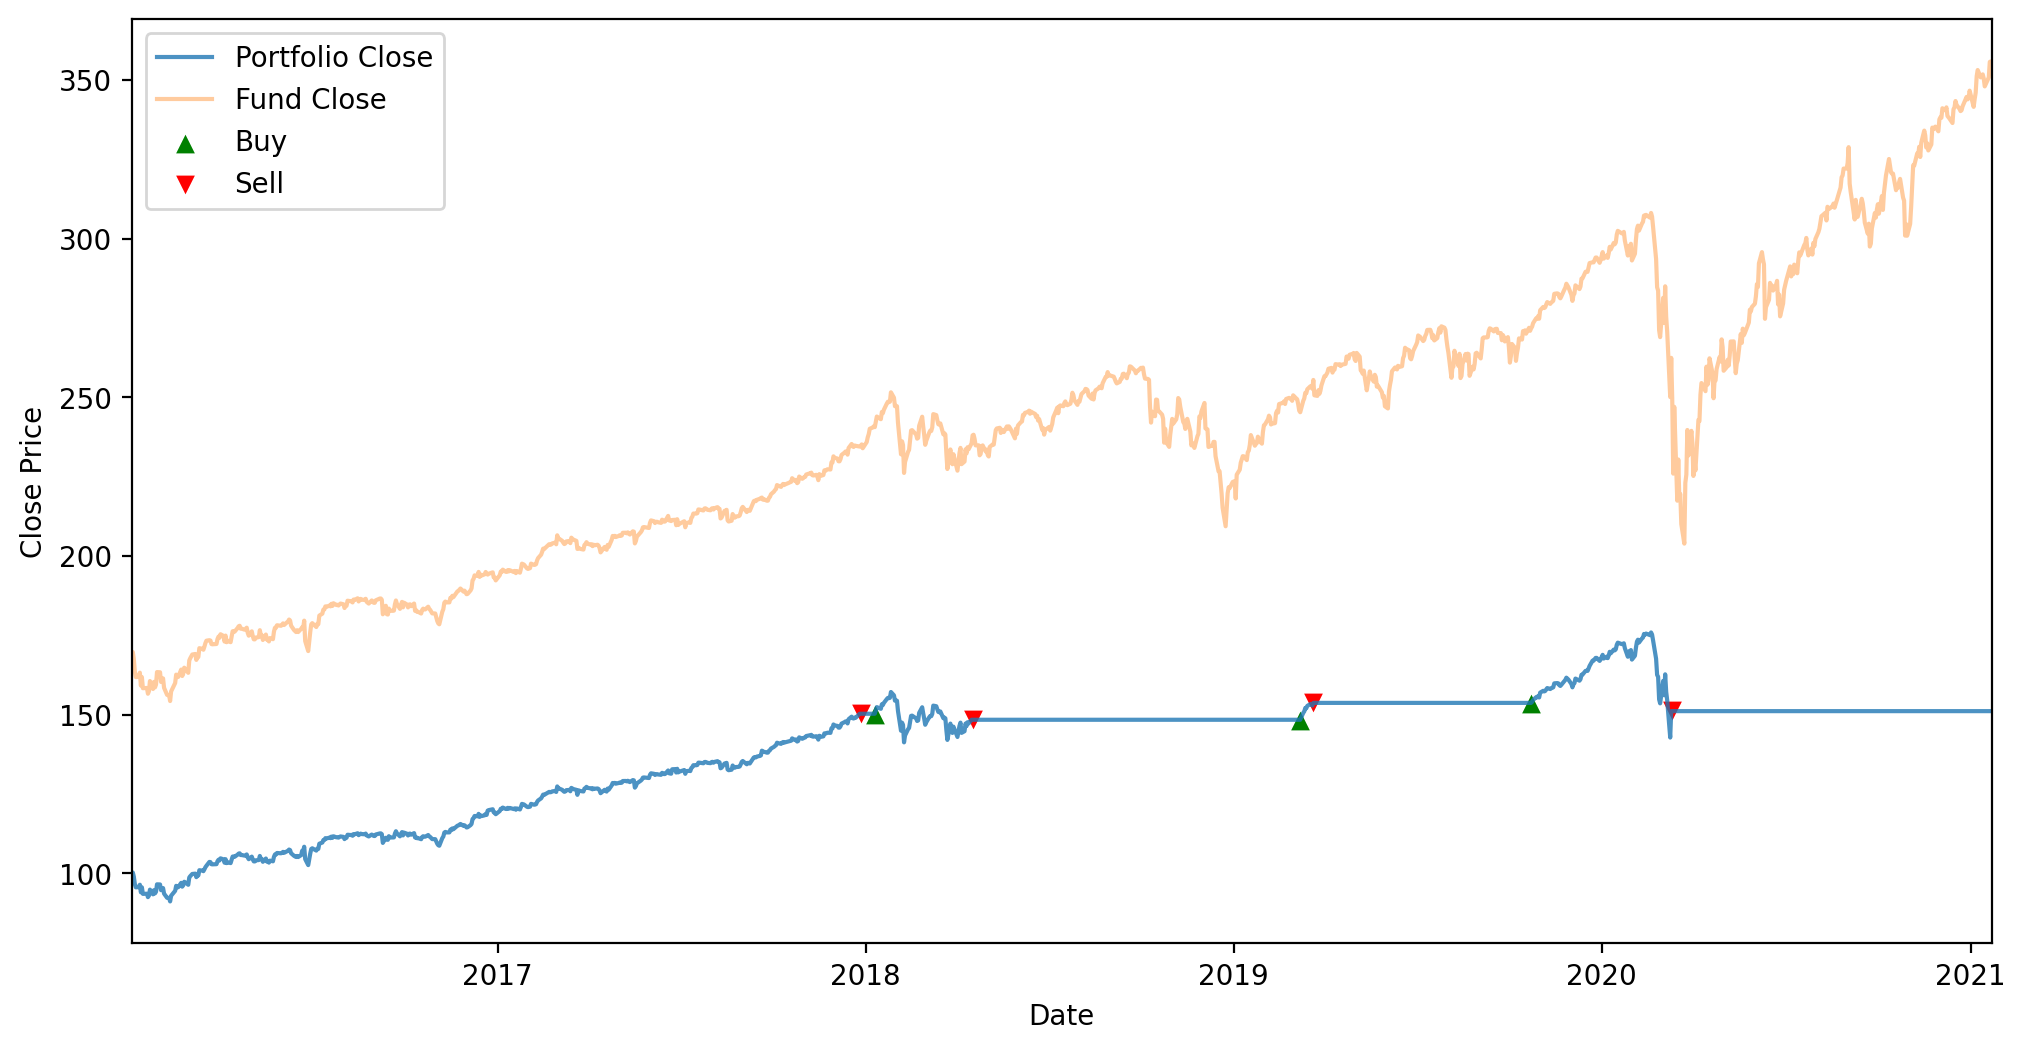

In [38]:
# Бычий рынок

start_date = test_df_bull.iloc[0].name
end_date = test_df_bull.iloc[-1].name
start_investment = test_df_bull.iloc[0]['Close']

TS = TradeSystem(start_investment, data, start_date, end_date, trade_needed=True, SMA_long_window=500, SMA_short_window=200, trade_year_coef=0.05)
TS.start_trade()
TS.plt()

# Из граффика и данных видно как торговая система сглаживает моменты волатильности на рынке фонад 
# В результате мы добились желаемого результата и выполнили условия: 
# CAGR Trade System: 0.08217223090051085 > CAGR Fund without div 0.8
# SHARP Trade System: 2.1195372220059077 > Sharpe with div 0.4
# Current state in cash: True

# trade_year_coef=0.0005

CAGR: 0.08508215464786151
SHARP: 2.1225493129069886
Total returns: 0.5105758123772164
Count trades: 7
Current state in cash: True

CAGR Fund without div: 0.15764521886454186
CAGR Sharpe with div: 0.8374080011132606



C:\Users\kavab\AppData\Local\Temp\ipykernel_15988\470156690.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio.loc[:, 'Close_Port'] = portfolio['Close']


0.13763857630486864

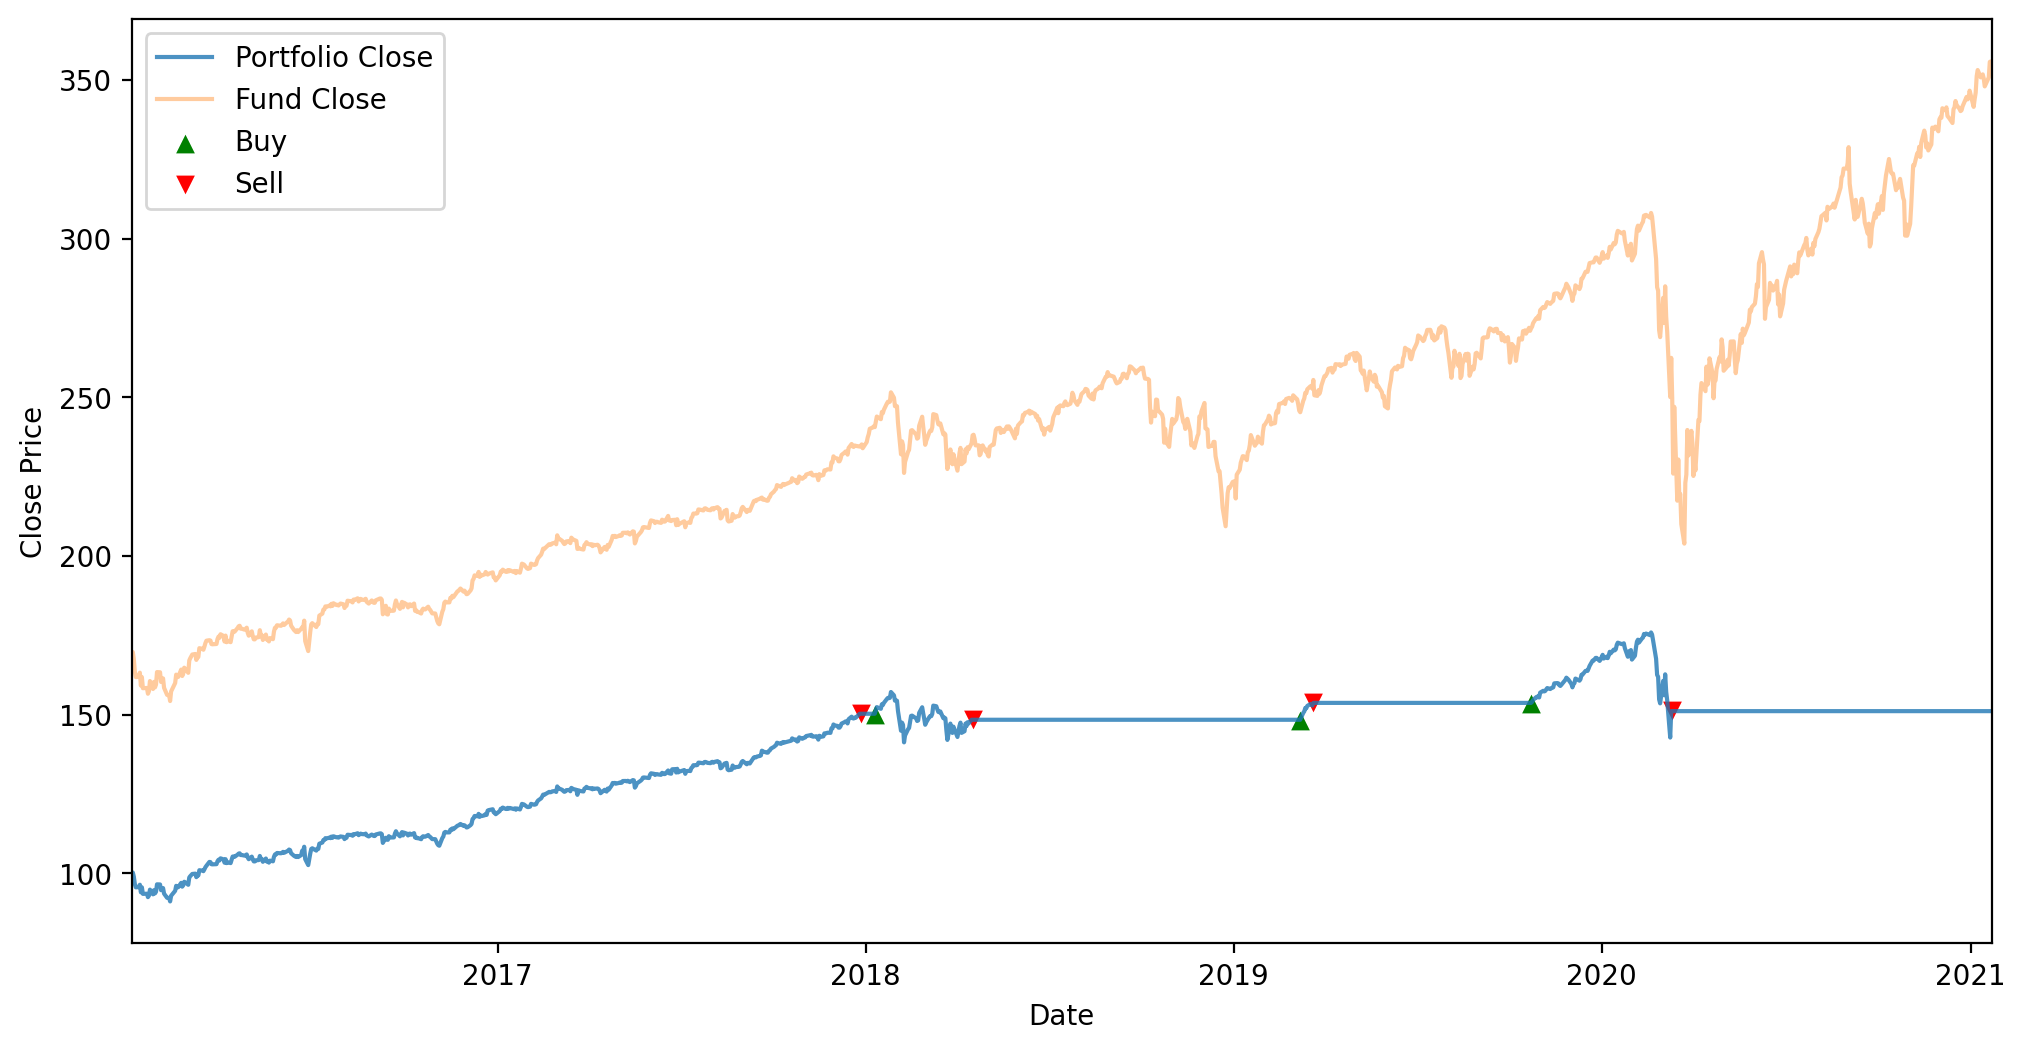

In [39]:
# Флэт

